## [기본세팅]

## Package upgrade  (제일 먼저 돌리고, 런타임 다시시작 눌러야됨)

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 2s (6,364 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [2]:
!pip install --upgrade matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 5.0 MB/s 
     |████████████████████████████████| 930 kB 32.6 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


## 라이브러리 불러오기

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

plt.style.use("default")

## [파일 불러오기]

In [2]:
# 파일 불러오기 (local에서 업로드)
from google.colab import files
files.upload()
df = pd.read_csv('vgames2.csv', sep=",", encoding="ISO-8859-1", header=0)
df.head()

Saving vgames2.csv to vgames2.csv


Unnamed: 0                                            Name Platform  \
0           1                    Candace Kane's Candy Factory       DS   
1           2                                  The Munchables      Wii   
2           3  Otome wa Oanesama Boku ni Koi Shiteru Portable      PSP   
3           4                Deal or No Deal: Special Edition       DS   
4           5       Ben 10 Ultimate Alien: Cosmic Destruction      PS3   

     Year      Genre           Publisher NA_Sales EU_Sales JP_Sales  \
0  2008.0     Action           Destineer     0.04        0        0   
1  2009.0     Action  Namco Bandai Games     0.17        0        0   
2  2010.0  Adventure           Alchemist        0        0     0.02   
3  2010.0       Misc           Zoo Games     0.04        0        0   
4  2010.0   Platform         D3Publisher     0.12     0.09        0   

  Other_Sales  
0           0  
1        0.01  
2           0  
3           0  
4        0.04

In [3]:
df.tail()

Unnamed: 0                         Name Platform    Year     Genre  \
16593       16594      Ice Age 2: The Meltdown       GC  2006.0  Platform   
16594       16595  Rainbow Islands: Revolution      PSP  2005.0    Action   
16595       16596                     NBA 2K16      PS3  2015.0    Sports   
16596       16597  Toukiden: The Age of Demons      PSV  2013.0    Action   
16597       16598     The King of Fighters '95       PS  1996.0  Fighting   

                         Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
16593                Vivendi Games     0.15     0.04        0        0.01  
16594            Rising Star Games     0.01        0        0           0  
16595         Take-Two Interactive     0.44     0.19     0.03        0.13  
16596                   Tecmo Koei     0.05     0.05     0.25        0.03  
16597  Sony Computer Entertainment        0        0     0.16        0.01

## [-1] Data 구조 파악

In [3]:
#count unique values in each column
print(df.nunique())
print(df.shape)

Unnamed: 0     16598
Name           11493
Platform          31
Year              62
Genre             12
Publisher        578
NA_Sales         494
EU_Sales         363
JP_Sales         282
Other_Sales      190
dtype: int64
(16598, 10)


In [4]:
# row 생략 없이 출력
pd.set_option('display.max_rows', 12)
# col 생략 없이 출력
pd.set_option('display.max_columns', 12)
df['Platform'].value_counts()

DS      2163
PS2     2161
PS3     1329
Wii     1325
X360    1265
        ... 
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, Length: 31, dtype: int64

In [5]:
# row 생략 없이 출력
pd.set_option('display.max_rows', 12)
# col 생략 없이 출력
pd.set_option('display.max_columns', 12)
df['Publisher'].value_counts()

Electronic Arts                 1351
Activision                       975
Namco Bandai Games               932
Ubisoft                          921
Konami Digital Entertainment     832
                                ... 
Game Arts                          1
Max Five                           1
CCP                                1
Quelle                             1
Just Flight                        1
Name: Publisher, Length: 578, dtype: int64

In [6]:
# row 생략 없이 출력
pd.set_option('display.max_rows', 10)
# col 생략 없이 출력
pd.set_option('display.max_columns', 10)
df['NA_Sales'].value_counts()

0        4443
0.02      537
0.01      536
0.03      528
0.05      523
         ... 
6.91        1
3.88        1
4.14        1
1.11M       1
4.18        1
Name: NA_Sales, Length: 494, dtype: int64

In [7]:
# row 생략 없이 출력
pd.set_option('display.max_rows', 10)
# col 생략 없이 출력
pd.set_option('display.max_columns', 10)
df['EU_Sales'].value_counts()

0        5665
0.01     1480
0.02     1255
0.03      925
0.04      734
         ... 
1.88        1
8.89        1
2.93M       1
2130K       1
7.06        1
Name: EU_Sales, Length: 363, dtype: int64

In [8]:
# row 생략 없이 출력
pd.set_option('display.max_rows', 10)
# col 생략 없이 출력
pd.set_option('display.max_columns', 10)
df['JP_Sales'].value_counts()

0        10333
0.02       716
0.01       696
0.03       521
0.04       393
         ...  
0.77M        1
2.1          1
1.5          1
2.54         1
1.37         1
Name: JP_Sales, Length: 282, dtype: int64

In [9]:
# row 생략 없이 출력
pd.set_option('display.max_rows', 10)
# col 생략 없이 출력
pd.set_option('display.max_columns', 10)
df['Other_Sales'].value_counts()

0       6386
0.01    3412
0.02    1567
0.03     926
0.04     660
        ... 
1.05       1
340K       1
1.78       1
1.41       1
2.26       1
Name: Other_Sales, Length: 190, dtype: int64

In [10]:
# row 생략 없이 출력
pd.set_option('display.max_rows', 12)
# col 생략 없이 출력
pd.set_option('display.max_columns', 12)
df['Genre'].value_counts()

Action          3305
Sports          2341
Misc            1734
Role-Playing    1483
Shooter         1308
Adventure       1280
Racing          1243
Platform         884
Simulation       865
Fighting         847
Strategy         680
Puzzle           578
Name: Genre, dtype: int64

In [11]:
print(df.shape)
print(df.info())
df.describe(include=['object', 'bool'])

(16598, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   16598 non-null  int64  
 1   Name         16598 non-null  object 
 2   Platform     16598 non-null  object 
 3   Year         16327 non-null  float64
 4   Genre        16548 non-null  object 
 5   Publisher    16540 non-null  object 
 6   NA_Sales     16598 non-null  object 
 7   EU_Sales     16598 non-null  object 
 8   JP_Sales     16598 non-null  object 
 9   Other_Sales  16598 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 1.3+ MB
None


Name Platform   Genre        Publisher  \
count                         16598    16598   16548            16540   
unique                        11493       31      12              578   
top     Need for Speed: Most Wanted       DS  Action  Electronic Arts   
freq                             12     2163    3305             1351   

       NA_Sales EU_Sales JP_Sales Other_Sales  
count     16598    16598    16598       16598  
unique      494      363      282         190  
top           0        0        0           0  
freq       4443     5665    10333        6386

### [0] 결측치 확인 & 제거 

In [12]:
# 결측치 확인 
df.isnull().sum()

Unnamed: 0       0
Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [13]:
df0 = df.dropna()
print(df0.head())
print(df0.tail())
print(df0)

   Unnamed: 0                                            Name Platform  \
0           1                    Candace Kane's Candy Factory       DS   
1           2                                  The Munchables      Wii   
2           3  Otome wa Oanesama Boku ni Koi Shiteru Portable      PSP   
3           4                Deal or No Deal: Special Edition       DS   
4           5       Ben 10 Ultimate Alien: Cosmic Destruction      PS3   

     Year      Genre           Publisher NA_Sales EU_Sales JP_Sales  \
0  2008.0     Action           Destineer     0.04        0        0   
1  2009.0     Action  Namco Bandai Games     0.17        0        0   
2  2010.0  Adventure           Alchemist        0        0     0.02   
3  2010.0       Misc           Zoo Games     0.04        0        0   
4  2010.0   Platform         D3Publisher     0.12     0.09        0   

  Other_Sales  
0           0  
1        0.01  
2           0  
3           0  
4        0.04  
       Unnamed: 0               

### ** [1] Year 바꾸기**

 
-19xx  [86,94,95,96,97,98] , 20XX [0~16] , N/A (271개) 

-고민할 지점: 출시 된지 오래 된 게임들을 분석하는 것이 필요할까? 


In [14]:
# Year 전처리
df0['Year'] = df0['Year'].apply(np.int64)
for i in range(17):
  df0.loc[df0['Year'] == i, 'Year'] = 2000+i
df0.loc[df0['Year'] < 100, 'Year'] += 1900
df0.info

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

<bound method DataFrame.info of        Unnamed: 0                                            Name Platform  \
0               1                    Candace Kane's Candy Factory       DS   
1               2                                  The Munchables      Wii   
2               3  Otome wa Oanesama Boku ni Koi Shiteru Portable      PSP   
3               4                Deal or No Deal: Special Edition       DS   
4               5       Ben 10 Ultimate Alien: Cosmic Destruction      PS3   
...           ...                                             ...      ...   
16593       16594                         Ice Age 2: The Meltdown       GC   
16594       16595                     Rainbow Islands: Revolution      PSP   
16595       16596                                        NBA 2K16      PS3   
16596       16597                     Toukiden: The Age of Demons      PSV   
16597       16598                        The King of Fighters '95       PS   

       Year      Genre         

In [15]:
df1 = df0
df1 = df1.loc[df0['Year'] >= 2000]
df1 = df1.loc[df0['Year'] <= 2016]

print(df1.head())
print(df1.info())

   Unnamed: 0                                            Name Platform  Year  \
0           1                    Candace Kane's Candy Factory       DS  2008   
1           2                                  The Munchables      Wii  2009   
2           3  Otome wa Oanesama Boku ni Koi Shiteru Portable      PSP  2010   
3           4                Deal or No Deal: Special Edition       DS  2010   
4           5       Ben 10 Ultimate Alien: Cosmic Destruction      PS3  2010   

       Genre           Publisher NA_Sales EU_Sales JP_Sales Other_Sales  
0     Action           Destineer     0.04        0        0           0  
1     Action  Namco Bandai Games     0.17        0        0        0.01  
2  Adventure           Alchemist        0        0     0.02           0  
3       Misc           Zoo Games     0.04        0        0           0  
4   Platform         D3Publisher     0.12     0.09        0        0.04  
<class 'pandas.core.frame.DataFrame'>
Int64Index: 14269 entries, 0 to 16596

### **[2] Sales 전처리**

In [16]:
# 지역별 Sales 전처리
df1['NA_Sales'] = df1['NA_Sales'].replace({'[kK]': '*0.001', '[mM]': '*1'}, regex=True).map(pd.eval).astype(float)
df1['EU_Sales'] = df1['EU_Sales'].replace({'[kK]': '*0.001', '[mM]': '*1'}, regex=True).map(pd.eval).astype(float)
df1['JP_Sales'] = df1['JP_Sales'].replace({'[kK]': '*0.001', '[mM]': '*1'}, regex=True).map(pd.eval).astype(float)
df1['Other_Sales'] = df1['Other_Sales'].replace({'[kK]': '*0.001', '[mM]': '*1'}, regex=True).map(pd.eval).astype(float)

df1.head()

Unnamed: 0                                            Name Platform  Year  \
0           1                    Candace Kane's Candy Factory       DS  2008   
1           2                                  The Munchables      Wii  2009   
2           3  Otome wa Oanesama Boku ni Koi Shiteru Portable      PSP  2010   
3           4                Deal or No Deal: Special Edition       DS  2010   
4           5       Ben 10 Ultimate Alien: Cosmic Destruction      PS3  2010   

       Genre           Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  
0     Action           Destineer      0.04      0.00      0.00         0.00  
1     Action  Namco Bandai Games      0.17      0.00      0.00         0.01  
2  Adventure           Alchemist      0.00      0.00      0.02         0.00  
3       Misc           Zoo Games      0.04      0.00      0.00         0.00  
4   Platform         D3Publisher      0.12      0.09      0.00         0.04

In [17]:
# Sales 합 Column 추가
df2 = df1
df2['Sales_sum'] = df1['NA_Sales']+df1['EU_Sales']+df1['JP_Sales']+df1['Other_Sales']

In [18]:
df2.describe()

Unnamed: 0          Year      NA_Sales      EU_Sales      JP_Sales  \
count  14269.000000  14269.000000  14269.000000  14269.000000  14269.000000   
mean    8277.966220   2007.945476      0.245068      0.145805      0.055890   
std     4789.993966      4.047115      0.716936      0.515061      0.246145   
min        1.000000   2000.000000      0.000000      0.000000      0.000000   
25%     4135.000000   2005.000000      0.000000      0.000000      0.000000   
50%     8267.000000   2008.000000      0.080000      0.020000      0.000000   
75%    12430.000000   2011.000000      0.230000      0.110000      0.030000   
max    16597.000000   2016.000000     41.490000     29.020000      6.500000   

        Other_Sales     Sales_sum  
count  14269.000000  14269.000000  
mean       0.051090      0.497853  
std        0.200257      1.468420  
min        0.000000      0.000000  
25%        0.000000      0.060000  
50%        0.010000      0.160000  
75%        0.040000      0.450000  
max       10.570000     82.740000

### **[3]   **

In [19]:
df2.groupby(['Genre'])['Sales_sum'].sum()

Genre
Action          1522.72
Adventure        184.44
Fighting         312.79
Misc             707.83
Platform         496.86
Puzzle           139.04
Racing           561.64
Role-Playing     703.45
Shooter          896.09
Simulation       336.44
Sports          1127.09
Strategy         115.47
Name: Sales_sum, dtype: float64

## ** 어떤 장르가 인기가 많을까? **

(모든 year, 포함)


# [1] 지역에 따라 선호하는 게임 장르가 다를까 

### (0) 장르 상관 없이, 연도별 모든 게임 출고량 

In [44]:
# row 생략 없이 출력
pd.set_option('display.max_rows', 10)
# col 생략 없이 출력
pd.set_option('display.max_columns', 10)
df2

Unnamed: 0                                            Name Platform  \
0               1                    Candace Kane's Candy Factory       DS   
1               2                                  The Munchables      Wii   
2               3  Otome wa Oanesama Boku ni Koi Shiteru Portable      PSP   
3               4                Deal or No Deal: Special Edition       DS   
4               5       Ben 10 Ultimate Alien: Cosmic Destruction      PS3   
...           ...                                             ...      ...   
16592       16593                                Minna no Chizu 2      PSP   
16593       16594                         Ice Age 2: The Meltdown       GC   
16594       16595                     Rainbow Islands: Revolution      PSP   
16595       16596                                        NBA 2K16      PS3   
16596       16597                     Toukiden: The Age of Demons      PSV   

       Year      Genre  ... NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
0      2008     Action  ...     0.04      0.00      0.00         0.00   
1      2009     Action  ...     0.17      0.00      0.00         0.01   
2      2010  Adventure  ...     0.00      0.00      0.02         0.00   
3      2010       Misc  ...     0.04      0.00      0.00         0.00   
4      2010   Platform  ...     0.12      0.09      0.00         0.04   
...     ...        ...  ...      ...       ...       ...          ...   
16592  2007       Misc  ...     0.00      0.00      0.02         0.00   
16593  2006   Platform  ...     0.15      0.04      0.00         0.01   
16594  2005     Action  ...     0.01      0.00      0.00         0.00   
16595  2015     Sports  ...     0.44      0.19      0.03         0.13   
16596  2013     Action  ...     0.05      0.05      0.25         0.03   

       Sales_sum  
0           0.04  
1           0.18  
2           0.02  
3           0.04  
4           0.25  
...          ...  
16592       0.02  
16593       0.20  
16594       0.01  
16595       0.79  
16596       0.38  

[14269 rows x 11 columns]

In [45]:
year_all = df0.groupby(['Year'])['Name'].count().reset_index()

In [46]:
year_all

Year  Name
0   1980     8
1   1981    46
2   1982    36
3   1983    17
4   1984    14
..   ...   ...
34  2014   580
35  2015   611
36  2016   342
37  2017     3
38  2020     1

[39 rows x 2 columns]

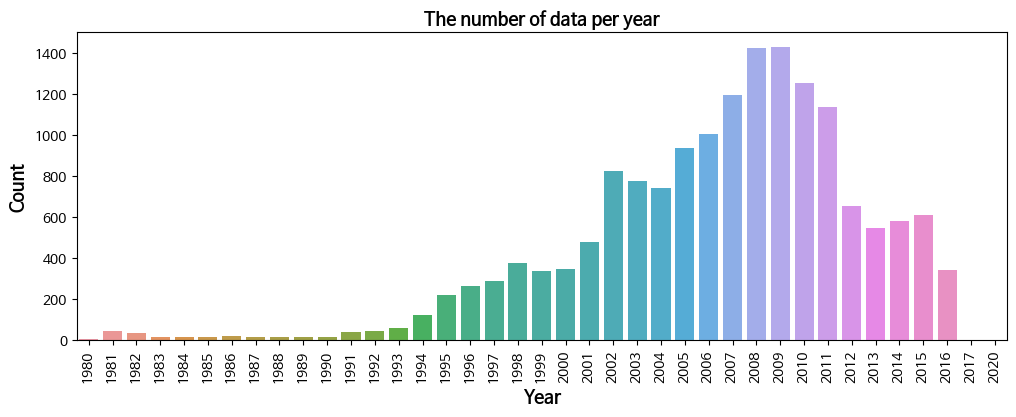

In [47]:
plt.figure(figsize=(12, 4))
g = sns.barplot(x='Year', y='Name', data=year_all, ci=None)
plt.xticks(rotation=90)
plt.ylabel('Count',fontsize = 13, fontweight = 'bold')
plt.xlabel('Year',fontsize = 13, fontweight = 'bold')

plt.title("The number of data per year",fontsize = 13, fontweight = 'bold')
plt.show()


In [48]:
# 연도별 지역 게임시장규모
groupby_year = df2.groupby('Year', as_index = False).sum()
groupby_year['Total_Sales'] = groupby_year.sum(axis = 1)
groupby_year.head()

Year  Unnamed: 0  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Sales_sum  \
0  2000     2722398     94.42     52.73     42.77        11.62     201.54   
1  2001     3838171    172.86     94.36     38.77        22.62     328.61   
2  2002     6848715    215.56    109.50     41.76        27.25     394.07   
3  2003     6303635    193.39    103.76     33.76        25.99     356.90   
4  2004     6144325    215.46    104.80     41.65        46.92     408.83   

   Total_Sales  
0   2724801.08  
1   3840829.22  
2   6851505.14  
3   6306351.80  
4   6147146.66

In [49]:
# 연도 및 장르별 판매량
df_groupby = df.groupby(['Year','Genre'], as_index = False).sum()
df_groupby['Total_Sales'] = df_groupby.iloc[:,2:].sum(axis = 1)
df_groupby

Year         Genre  Unnamed: 0  Total_Sales
0       0.0      Platform       14667        14667
1       0.0       Shooter       16395        16395
2       0.0      Strategy        9277         9277
3       1.0        Racing        2250         2250
4       1.0        Sports        8682         8682
..      ...           ...         ...          ...
462  2016.0        Sports      369852       369852
463  2016.0      Strategy       77904        77904
464  2017.0        Action        5311         5311
465  2017.0  Role-Playing       25342        25342
466  2020.0    Simulation        6907         6907

[467 rows x 4 columns]

In [50]:
import plotly.express as px
from plotly.subplots import make_subplots

fig = px.line(groupby_year, x = 'Year', y = 'Total_Sales', title = 'Game Trend : Total Sales')
fig.show()

### (1) Sales per Genre (2000~)

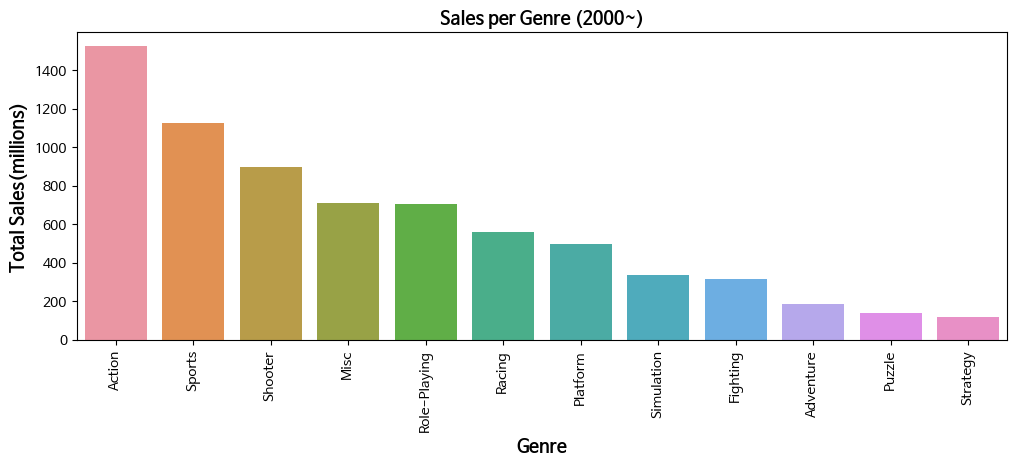

In [51]:
plt.figure(figsize=(12, 4))
Sales_genre = df2.groupby(['Genre'])['Sales_sum'].sum().to_frame().sort_values(by="Sales_sum",ascending=False)
g = sns.barplot(x=Sales_genre.index, y='Sales_sum', data=Sales_genre, ci=None)
plt.xticks(rotation=90)
plt.xlabel('Genre',fontsize=13, fontweight = 'bold')
plt.ylabel('Total Sales(millions)',fontsize=13, fontweight = 'bold')
plt.title("Sales per Genre (2000~)",fontsize=13, fontweight = 'bold')
plt.show()


### (1)-2 Sales per Genre (all year)

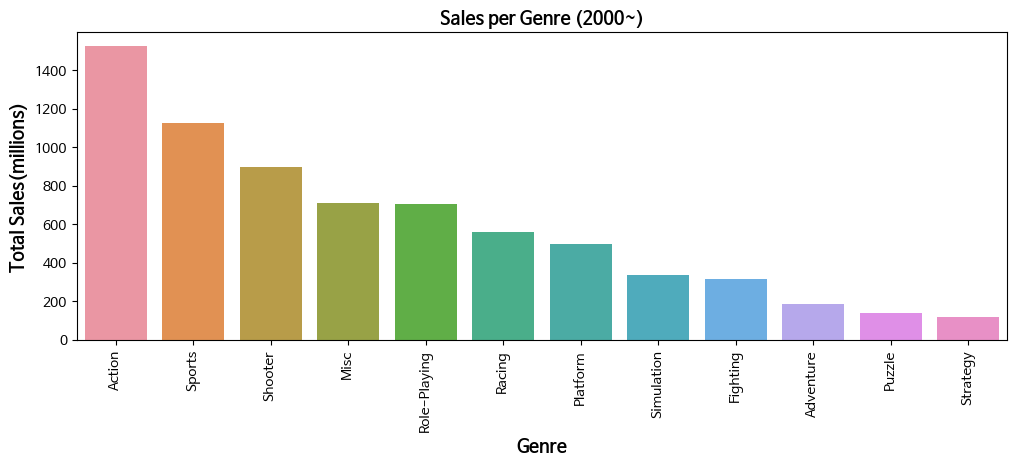

In [52]:
plt.figure(figsize=(12, 4))
Sales_genre = df2.groupby(['Genre'])['Sales_sum'].sum().to_frame().sort_values(by="Sales_sum",ascending=False)
g = sns.barplot(x=Sales_genre.index, y='Sales_sum', data=Sales_genre, ci=None)
plt.xticks(rotation=90)
plt.xlabel('Genre',fontsize=13, fontweight = 'bold')
plt.ylabel('Total Sales(millions)',fontsize=13, fontweight = 'bold')
plt.title("Sales per Genre (2000~)",fontsize=13, fontweight = 'bold')
plt.show()

### (2) Count per Genre (2000~)

Nothing special

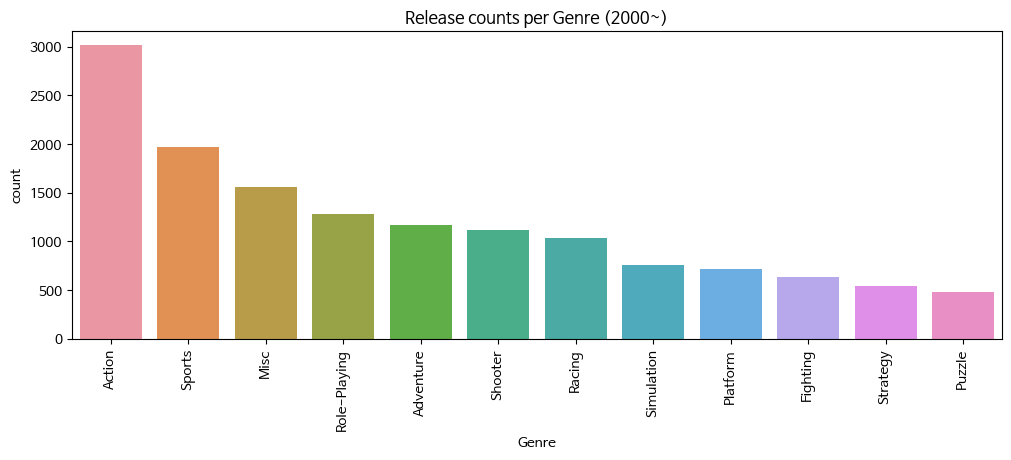

In [53]:
plt.figure(figsize=(12, 4))
sns.countplot(x="Genre", data=df2, order = df2['Genre'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Release counts per Genre (2000~)")
plt.show()

### (4)-1 지역별 장르  bar chart

-지역마다 인구수도 다르고, 게임 인구 수 자체가 다르지 않나?? 

In [54]:
genre_locs = df2.groupby(['Genre'])['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales',	'Sales_sum'].sum().reset_index()
genre_locs

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Genre  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Sales_sum
0         Action    747.91    469.27    128.68       176.86    1522.72
1      Adventure     82.41     49.96     36.97        15.10     184.44
2       Fighting    160.62     75.41     44.75        32.01     312.79
3           Misc    360.49    194.27     82.59        70.48     707.83
4       Platform    258.49    141.24     55.09        42.04     496.86
..           ...       ...       ...       ...          ...        ...
7   Role-Playing    271.64    150.96    231.90        48.95     703.45
8        Shooter    484.88    289.73     22.78        98.70     896.09
9     Simulation    162.93    104.34     40.06        29.11     336.44
10        Sports    585.91    339.25     75.71       126.22    1127.09
11      Strategy     46.16     32.58     27.51         9.22     115.47

[12 rows x 6 columns]

**장르 불문, 지역별 판매량 **

In [55]:
# 장르 불문, 지역별 판매량 
locs_sum = pd.DataFrame({'NA_Sales':[genre_locs['NA_Sales'].sum()],
                         'EU_Sales':[genre_locs['EU_Sales'].sum()],
                         'JP_Sales':[genre_locs['JP_Sales'].sum()],
                         'Other_Sales':[genre_locs['Other_Sales'].sum()]}, dtype = float)
locs_sum

NA_Sales  EU_Sales  JP_Sales  Other_Sales
0   3496.87   2080.49     797.5        729.0

In [56]:
print('[지역별 전체]\n',)
print('North America:',genre_locs['NA_Sales'].sum())
print('Europe       :',genre_locs['EU_Sales'].sum())
print('Japan        :',genre_locs['JP_Sales'].sum())
print('Other_Sales  :',genre_locs['Other_Sales'].sum())


[지역별 전체]

North America: 3496.8699999999994
Europe       : 2080.4900000000002
Japan        : 797.5
Other_Sales  : 729.0000000000001


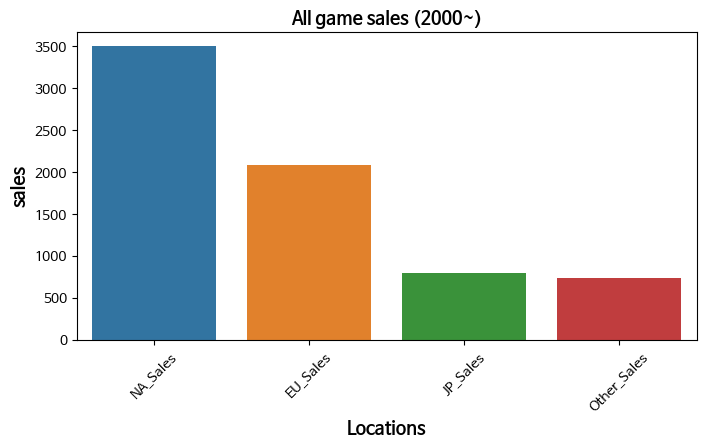

In [57]:
plt.figure(figsize=(8, 4))
g = sns.barplot( data=locs_sum)
index = 0
#for value in locs_sum['sales'].values:
#     print(asd)
#    g.text(index, value + 5, str( '----' +str(value.round(2))), color='#000', size=14, rotation= 90, ha="center")
 #   index += 1
plt.xticks(rotation=45)
plt.title("All game sales (2000~)",fontsize=13, fontweight = 'bold')
g.set_ylabel('sales', fontsize='13', fontweight = 'bold')
g.set_xlabel('Locations', fontsize='13', fontweight = 'bold')
#plt.ylim([0, 800])

plt.show()

### (4)-2 지역별 장르  pie chart

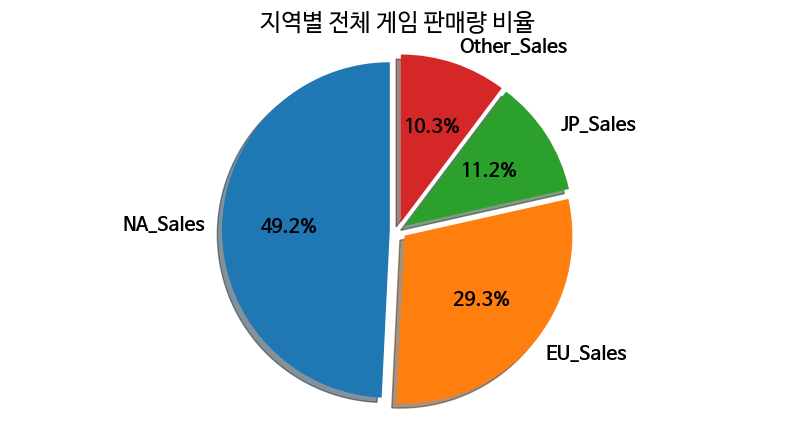

In [58]:
import matplotlib.pyplot as plt



plt.rc('font', family='NanumBarunGothic') 



# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = list(locs_sum)
sizes = locs_sum.values[0]
explode = (0.05, 0.05, 0.05, 0.05)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize=(10, 5))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,textprops={'fontsize': 14,'weight': 'bold','color':'black'})
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("지역별 전체 게임 판매량 비율")
ax1.set_title('지역별 전체 게임 판매량 비율', fontdict={'fontsize': 17})

plt.show()

### (4)-3 지역별 장르  pyplot + bar chart 

pyplot : 지역별 출고량(장르 불문)

barchart : 지역별 장르 선호도 (장르 top 5?) 

https://matplotlib.org/stable/gallery/pie_and_polar_charts/bar_of_pie.html#sphx-glr-gallery-pie-and-polar-charts-bar-of-pie-py

In [59]:
locs_sum.head()

NA_Sales  EU_Sales  JP_Sales  Other_Sales
0   3496.87   2080.49     797.5        729.0

In [60]:
genre_locs.head(5)

Genre  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Sales_sum
0     Action    747.91    469.27    128.68       176.86    1522.72
1  Adventure     82.41     49.96     36.97        15.10     184.44
2   Fighting    160.62     75.41     44.75        32.01     312.79
3       Misc    360.49    194.27     82.59        70.48     707.83
4   Platform    258.49    141.24     55.09        42.04     496.86

In [61]:
JP_top5  = genre_locs['JP_Sales'].sort_values(ascending=False)
#JP_top5  pd.DataFrame({'top5': ,
#                       'Genre':genre_locs[JP_top5[range(0,6)]] })

In [62]:
a= 'JP_Sales'

def Top_5_sales(a,etc):
  etc : bool 
  location_top  = genre_locs.sort_values(by =a,ascending=False)
  location_top5 = location_top.iloc[0:5]

  sales_all = location_top[a].sum().round(2)
  sales_etc = location_top[a].iloc[5:12].sum().round(2)
  sales_etc_ratio = sales_etc/sales_all
  if etc == True:
    top5 = pd.DataFrame({'Ranking':[1,2,3,4,5,'etc'],
                      'Genre':np.append(location_top5['Genre'].iloc[0:5], np.array(['etc'])),
                       'Sales':np.append(location_top5[a].iloc[0:5]/sales_all, np.array([sales_etc_ratio]))})
  elif etc == False:
    top5 = pd.DataFrame({'Ranking':[1,2,3,4,5],
                      'Genre':location_top5['Genre'].iloc[0:5],
                       'Sales':location_top5[a].iloc[0:5]/sales_all})
  return top5 , sales_etc_ratio
Top_5_sales(a,etc = False)

(    Ranking         Genre     Sales
 7         1  Role-Playing  0.290784
 0         2        Action  0.161354
 3         3          Misc  0.103561
 10        4        Sports  0.094934
 4         5      Platform  0.069078, 0.2802884012539185)

In [63]:
locs_sum/locs_sum.sum(axis =1).values[0]

NA_Sales  EU_Sales  JP_Sales  Other_Sales
0  0.492249  0.292868  0.112263      0.10262

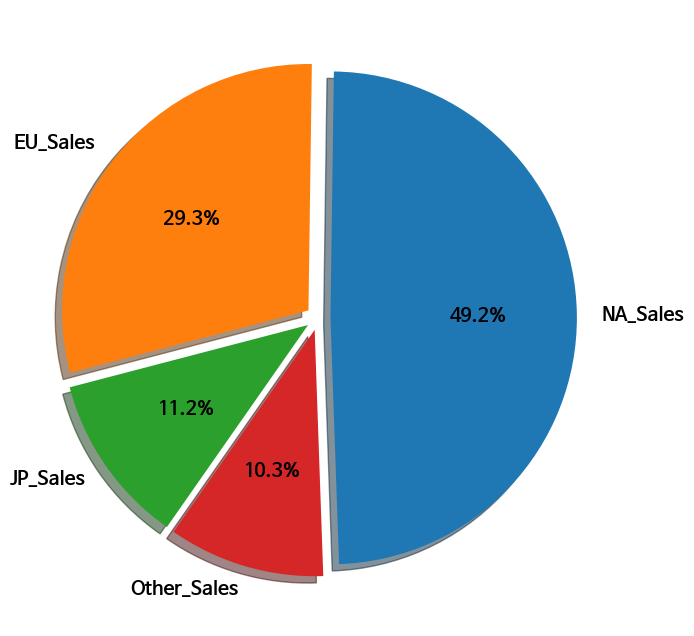

In [64]:
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import numpy as np
angle=[]
a= 'NA_Sales'  # 'NA_Sales' 'JP_Sales'  'EU_Sales' 'Other_Sales'
# for bar graph ( favorite genre top 5 )
if a == 'NA_Sales':
  b= 0
  angle = 272
elif a == 'EU_Sales':
  b= 1
  angle = 144
elif a == 'JP_Sales':
  b= 2
  angle = 72
elif a == 'Other_Sales':
  b= 3 
  angle = 27

top5 ,sales_etc_ratio = Top_5_sales(a,etc = False)
locs_ratio =locs_sum/locs_sum.sum(axis =1).values[0]

# make figure and assign axis objects
fig, (ax1 ) = plt.subplots(1, 1, figsize=(10, 8))
fig.subplots_adjust(wspace=0)

# pie chart parameters
overall_ratios = locs_ratio.values[0]

labels = list(locs_ratio)

explode = (0.05, 0.05, 0.05, 0.05)  # only "explode" the 2nd slice (i.e. 'Hogs')
# rotate so that first wedge is split by the x-axis
#angle = -180 * locs_ratio[a].values[0].round(2)
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                     shadow=True,labels=labels, explode=explode,textprops={'fontsize': 14,'weight': 'bold','color':'black'})

# bar chart parameters
age_ratios = list(top5['Sales'])
age_labels = list(top5['Genre'])
bottom = 1
width = .2
bar_color = 'C'+str(b)

-360*0.6 for eu = -216    // 144

-180*0.492249 for NA = -88.60482   // 272

180*0.4 for JP =  -288 // 72

180*0.15 for others  =  -333  //27
 



In [65]:
360*0.5

180.0

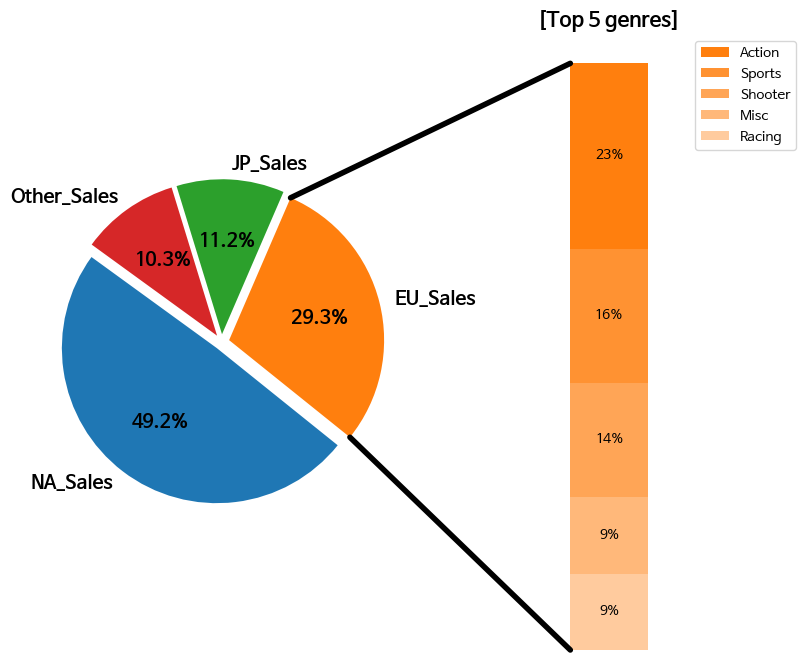

In [66]:
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import numpy as np
angle=[]
a= 'EU_Sales'  # 'NA_Sales' 'JP_Sales'  'EU_Sales' 'Other_Sales'
# for bar graph ( favorite genre top 5 )
if a == 'NA_Sales':
  b= 0
  angle = 272
elif a == 'EU_Sales':
  b= 1
  angle = 144
elif a == 'JP_Sales':
  b= 2
  angle = 72
elif a == 'Other_Sales':
  b= 3 
  angle = 27

top5 ,sales_etc_ratio = Top_5_sales(a,etc = False)
locs_ratio =locs_sum/locs_sum.sum(axis =1).values[0]

# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 8))
fig.subplots_adjust(wspace=0)

# pie chart parameters
overall_ratios = locs_ratio.values[0]

labels = list(locs_ratio)

explode = (0.05, 0.05, 0.05, 0.05)  # only "explode" the 2nd slice (i.e. 'Hogs')
# rotate so that first wedge is split by the x-axis
#angle = -180 * locs_ratio[a].values[0].round(2)
wedges, *_ = ax1.pie(overall_ratios, autopct='%1.1f%%', startangle=angle,
                     labels=labels, explode=explode,textprops={'fontsize': 14,'weight': 'bold','color':'black'})

# bar chart parameters
age_ratios = list(top5['Sales'])
age_labels = list(top5['Genre'])
bottom = 1
width = .2
bar_color = 'C'+str(b)

# Adding from the top matches the legend.

#for j, (height, label) in enumerate(reversed([*zip(age_ratios, age_labels)])):
for j, (height, label) in enumerate([*zip(age_ratios, age_labels)]):
    bottom -= height
    bc = ax2.bar(0, height, width, bottom=bottom, color=bar_color, label=label,
                 alpha= 1-0.15 * j)
    ax2.bar_label(bc, labels=[f"{height:.0%}"], label_type='center')

ax2.set_title('[Top 5 genres]',fontweight ='bold',fontsize ='15')
ax2.legend()
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)

# use ConnectionPatch to draw lines between the two plots
theta1, theta2 = wedges[b].theta1, wedges[b].theta2
center, r = wedges[b].center, wedges[b].r
bar_height = sum(age_ratios) + sales_etc_ratio

# draw top connecting line
x = r * np.cos(np.pi / 180 * theta2) + center[0]
y = r * np.sin(np.pi / 180 * theta2) + center[1]
con = ConnectionPatch(xyA=(-width / 2, bar_height), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
con.set_linewidth(4)
ax2.add_artist(con)

# draw bottom connecting line
x = r * np.cos(np.pi / 180 * theta1) + center[0]
y = r * np.sin(np.pi / 180 * theta1) + center[1]
con = ConnectionPatch(xyA=(-width / 2, sales_etc_ratio), coordsA=ax2.transData,
                      xyB=(x, y), coordsB=ax1.transData)
con.set_color([0, 0, 0])
ax2.add_artist(con)
con.set_linewidth(4)

plt.show()

# [2] 연도별 게임의 트랜드

- Year
- Genre
- Platform

### (0) Year x Genre (all sales; 2000~)

sns.barplot


In [67]:
year_max_df = df2.groupby(['Year'])['Sales_sum'].sum().reset_index(name='sales')
year_max_df.head()

Year   sales
0  2000  201.54
1  2001  328.61
2  2002  394.07
3  2003  356.90
4  2004  408.83

In [68]:
year_max_df.max()

Year     2016.00
sales     676.41
dtype: float64

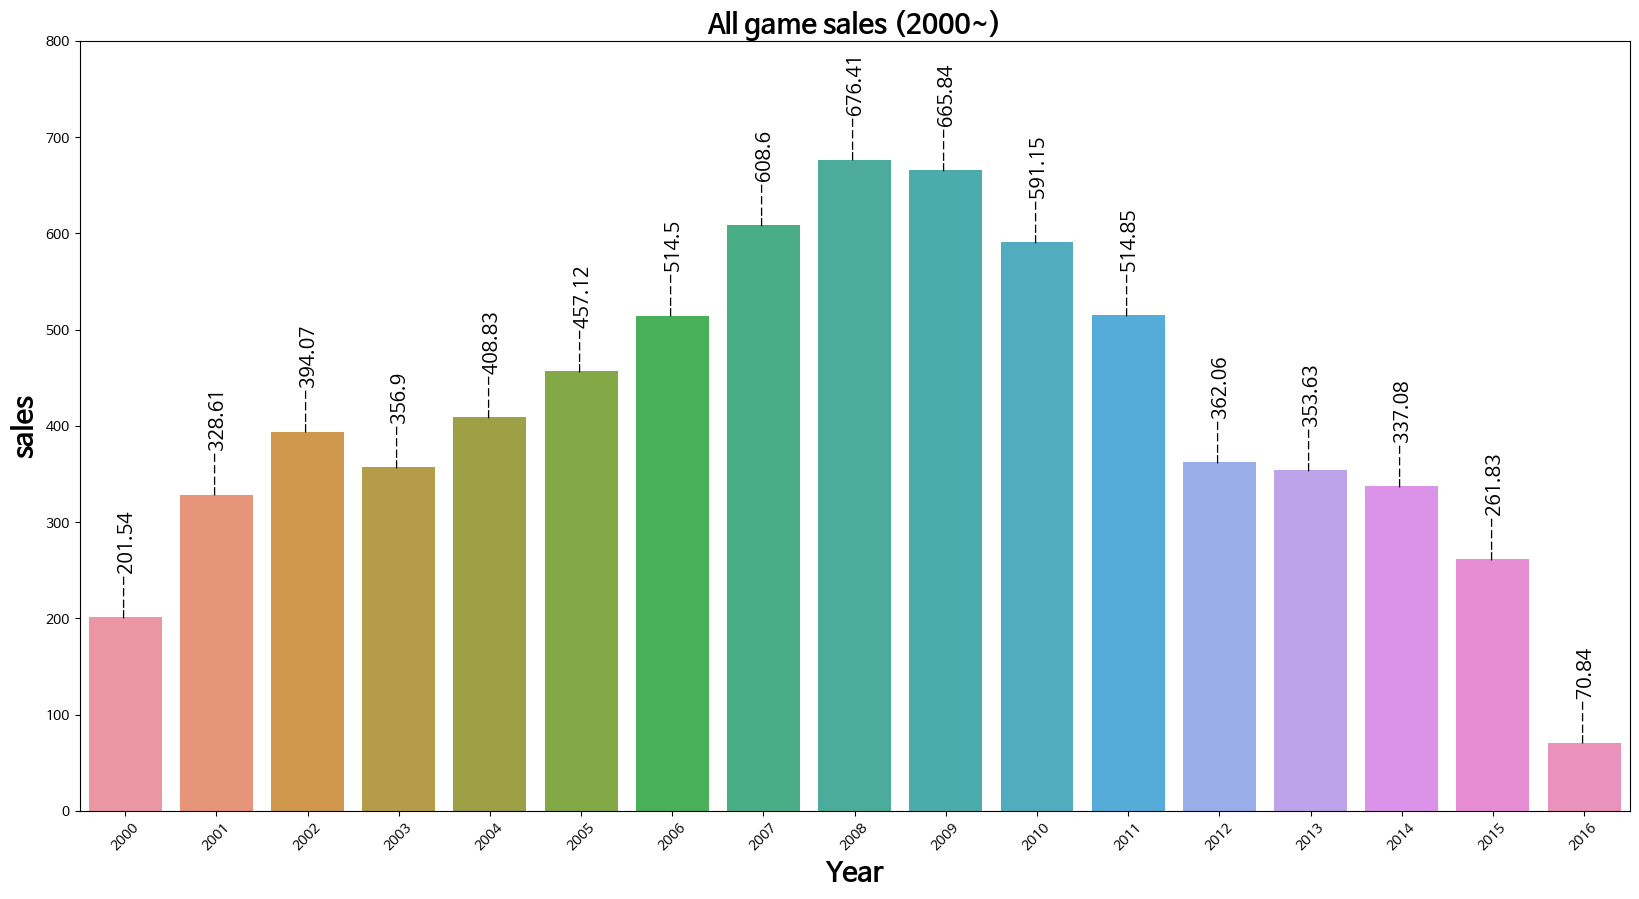

In [69]:
plt.figure(figsize=(20, 10))
g = sns.barplot(x='Year', y='sales', data=year_max_df)
index = 0
for value in year_max_df['sales'].values:
#     print(asd)
    g.text(index, value + 5, str( '----' +str(value.round(2))), color='#000', size=14, rotation= 90, ha="center")
    index += 1
plt.xticks(rotation=45)
plt.title("All game sales (2000~)",fontsize=20, fontweight = 'bold')
g.set_ylabel('sales', fontsize='20', fontweight = 'bold')
g.set_xlabel('Year', fontsize='20', fontweight = 'bold')
plt.ylim([0, 800])

plt.show()

### (1)-1  Year x Genre (Counts of 1st; 2000~)

**Nothing special**

sns.barplot


In [70]:
year_max_df = df2.groupby(['Year', 'Genre']).size().reset_index(name='count')
year_max_idx = year_max_df.groupby(['Year'])['count'].transform(max) == year_max_df['count']
year_max_genre = year_max_df[year_max_idx].reset_index(drop=True)
year_max_genre = year_max_genre.drop_duplicates(subset=["Year", "count"], keep='last').reset_index(drop=True)
# year_max_genre

In [71]:
genre = year_max_genre['Genre'].values
# genre[0]

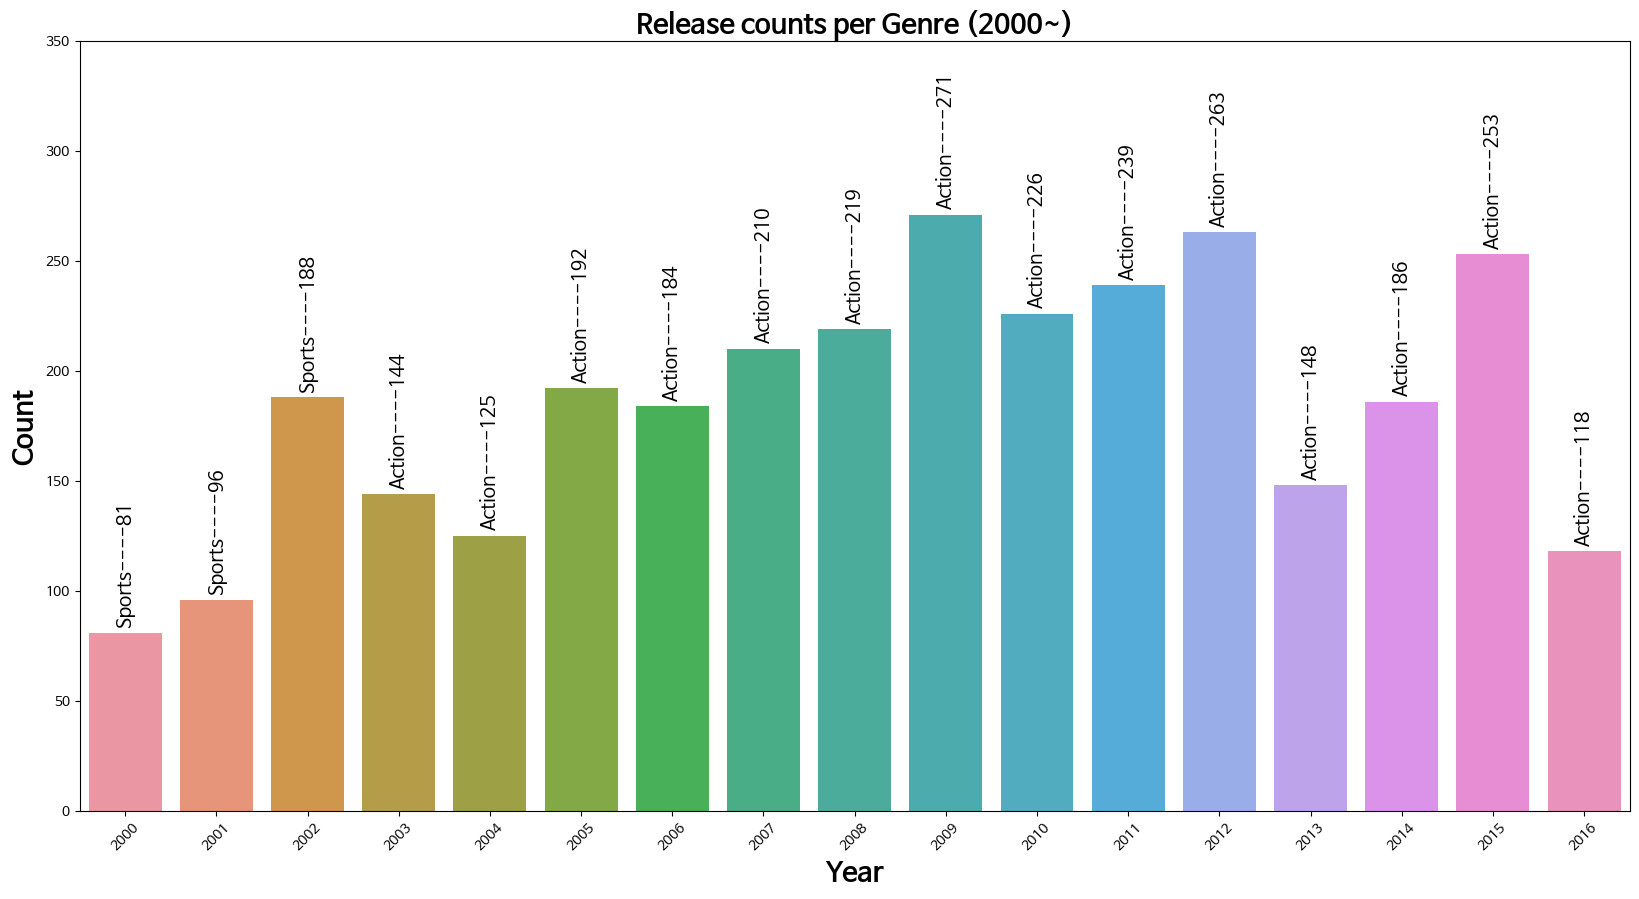

In [72]:
plt.figure(figsize=(20, 10))
g = sns.barplot(x='Year', y='count', data=year_max_genre)
index = 0
for value in year_max_genre['count'].values:
#     print(asd)
    g.text(index, value + 5, str(genre[index] + '----' +str(value)), color='#000', size=14, rotation= 90, ha="center")
    index += 1
plt.xticks(rotation=45)
plt.title("Release counts per Genre (2000~)",fontsize=20, fontweight = 'bold')
g.set_ylabel('Count', fontsize='20', fontweight = 'bold')
g.set_xlabel('Year', fontsize='20', fontweight = 'bold')

plt.ylim([0, 350])
plt.show()

### (1)-2 Year x Genre (sales of 1st; 2000~)

sns.barplot

In [73]:
year_max_df = df2.groupby(['Year', 'Genre'])['Sales_sum'].sum().reset_index(name='sales')
year_max_df.head()

Year      Genre  sales
0  2000     Action  33.89
1  2000  Adventure   2.96
2  2000   Fighting  20.26
3  2000       Misc  15.55
4  2000   Platform  16.05

In [74]:
year_max_idx = year_max_df.groupby(['Year'])['sales'].transform(max) == year_max_df['sales']
year_max_genre = year_max_df[year_max_idx].reset_index(drop=True)
year_max_genre = year_max_genre.drop_duplicates(subset=["Year", "sales"], keep='last').reset_index(drop=True)
# year_max_genre

In [75]:
year_all_df = df2.groupby(['Year'])['Sales_sum'].sum().reset_index(name='sales')
year_max_genre.round(2)
genre = year_max_genre['Genre'].values


In [76]:
# 
year_max_genre['max/all ratio']=year_max_genre['sales'].values / year_all_df['sales'].values

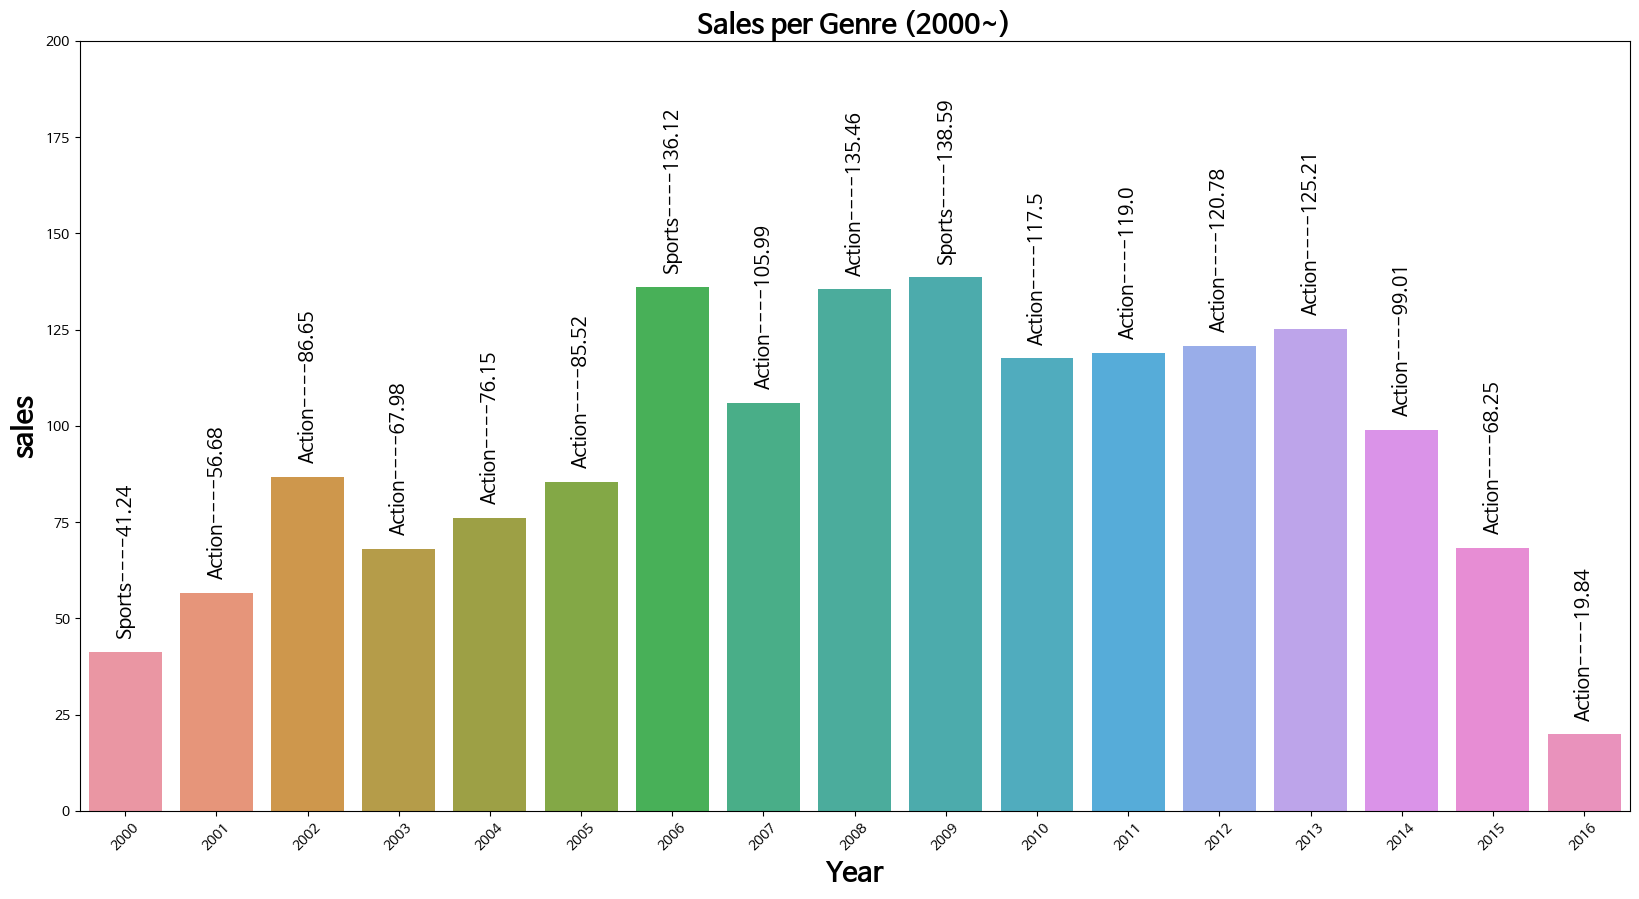

In [77]:
plt.figure(figsize=(20, 10))
g = sns.barplot(x='Year', y='sales', data=year_max_genre)
index = 0
for value in year_max_genre['sales'].values:
#     print(asd)
    g.text(index, value + 5, str(genre[index] + '----' +str(value.round(2))), color='#000', size=14, rotation= 90, ha="center")
    index += 1
plt.xticks(rotation=45)
plt.title("Sales per Genre (2000~)",fontsize=20, fontweight = 'bold')
g.set_ylabel('sales', fontsize='20', fontweight = 'bold')
g.set_xlabel('Year', fontsize='20', fontweight = 'bold')
plt.ylim([0, 200])

plt.show()

### (2) Year x Genre ( sales ratio of **1st** /all ; 2000~)

sns.barplot

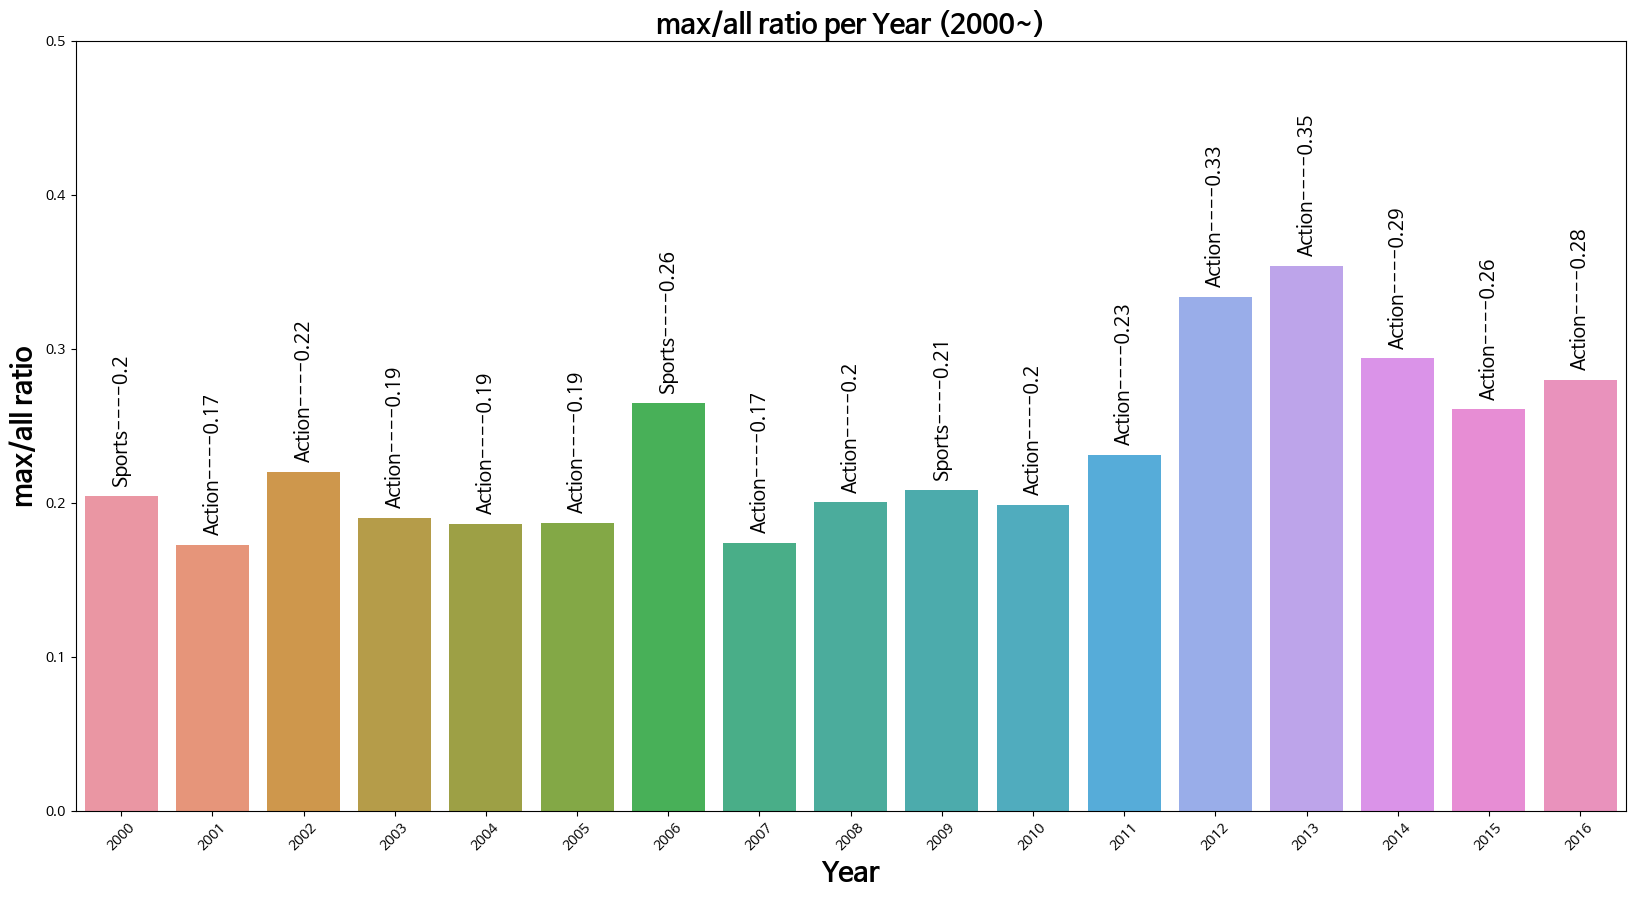

In [78]:
plt.figure(figsize=(20, 10))
g = sns.barplot(x='Year', y='max/all ratio', data=year_max_genre)
index = 0
for value in year_max_genre['max/all ratio'].values:
#     print(asd)
    g.text(index, value + 0.01, str(genre[index] + '----' +str(value.round(2))), color='#000', size=14, rotation= 90, ha="center")
    index += 1
plt.xticks(rotation=45)
plt.title("max/all ratio per Year (2000~)",fontsize=20, fontweight = 'bold')
g.set_ylabel('max/all ratio', fontsize='20', fontweight = 'bold')
g.set_xlabel('Year', fontsize='20', fontweight = 'bold')
plt.ylim([0, 0.5])

plt.show()

### (3) Year x Genre (sales ratio of **Top 3** /all ; 2000~) 
sns.barplot

sns.catplot

In [79]:
year_max2_df =year_max_df

In [80]:
dfdf0 =[]
for a, y in enumerate(year_max2_df['Year']):
    #year_max2_df['max/all ratio'][a]  = year_max2_df.loc[a]['sales'] / year_all_df[year_all_df['Year'] == y]['sales'].values
    val = year_max2_df.loc[a]['sales'] / year_all_df[year_all_df['Year'] == y]['sales'].values
    dfdf0.append(val[0])

year_max2_df['each/all ratio'] = dfdf0



In [81]:
year_all_df = df2.groupby(['Year'])['Sales_sum'].sum().reset_index(name='sales')
year_max2_df.round(2)
genre = year_max2_df['Genre'].values

#year_max2_df['max/all ratio']= year_max2_df['sales'].values / year_all_df['sales'].values

In [82]:
year_max2_df

Year         Genre  sales  each/all ratio
0    2000        Action  33.89        0.168155
1    2000     Adventure   2.96        0.014687
2    2000      Fighting  20.26        0.100526
3    2000          Misc  15.55        0.077156
4    2000      Platform  16.05        0.079637
..    ...           ...    ...             ...
198  2016  Role-Playing   6.75        0.095285
199  2016       Shooter  18.17        0.256494
200  2016    Simulation   0.39        0.005505
201  2016        Sports  14.63        0.206522
202  2016      Strategy   0.52        0.007340

[203 rows x 4 columns]

In [83]:
idx1 = year_max2_df[year_max2_df['Genre'] == "Action"]
idx2 = year_max2_df[year_max2_df['Genre'] == "Shooter" ]
idx3 = year_max2_df[year_max2_df['Genre'] == "Sports"]

ym_df = pd.concat([idx1, idx2,idx3], sort = True)

ym_df

Genre  Year  each/all ratio  sales
0    Action  2000        0.168155  33.89
12   Action  2001        0.172484  56.68
24   Action  2002        0.219885  86.65
36   Action  2003        0.190474  67.98
48   Action  2004        0.186263  76.15
..      ...   ...             ...    ...
154  Sports  2012        0.085345  30.90
166  Sports  2013        0.117467  41.54
178  Sports  2014        0.138365  46.64
190  Sports  2015        0.158462  41.49
201  Sports  2016        0.206522  14.63

[51 rows x 4 columns]

<AxesSubplot:xlabel='Year', ylabel='sales'>

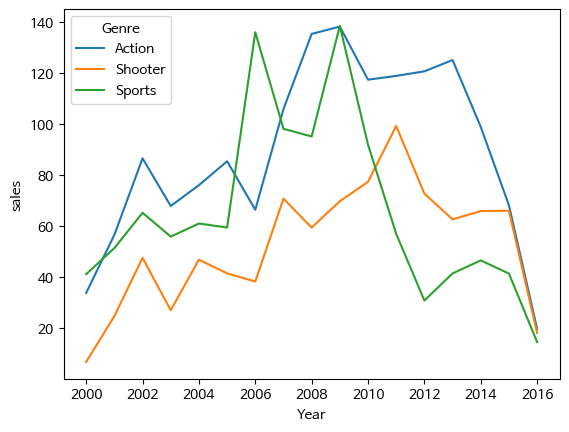

In [84]:
#sns.displot(data= ym_df, x="Year", hue="Genre", y = "sales")
#sns.histplot(data=ym_df, x="Year", hue="Genre", y = "sales",multiple="layer")
sns.lineplot(data=ym_df, x="Year", hue="Genre", y = "sales")


<AxesSubplot:xlabel='Year', ylabel='each/all ratio'>

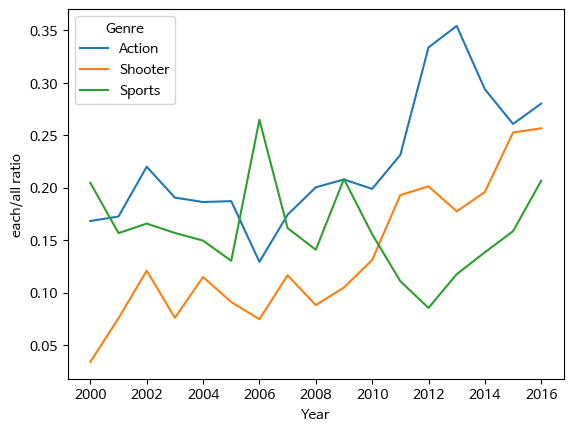

In [85]:
#sns.displot(data= ym_df, x="Year", hue="Genre", y = "sales")
#sns.histplot(data=ym_df, x="Year", hue="Genre", y = "sales",multiple="layer")
sns.lineplot(data=ym_df, x="Year", hue="Genre", y = "each/all ratio")


<Figure size 3000x2500 with 0 Axes>

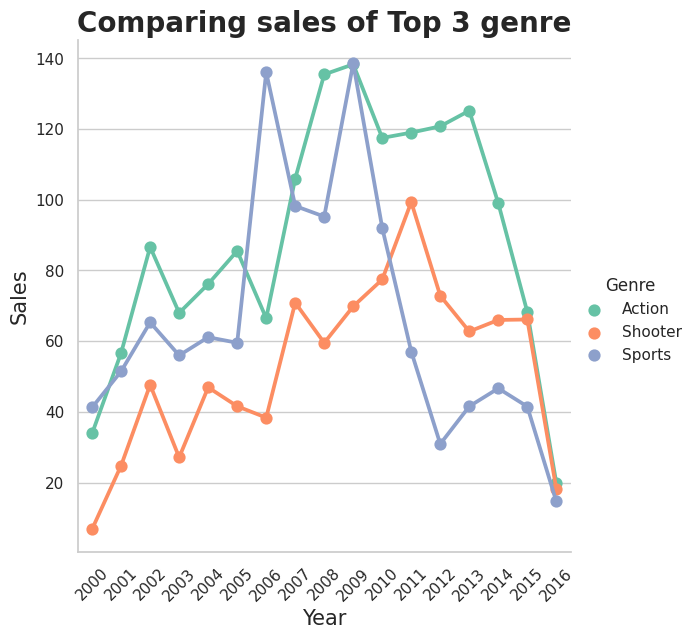

In [86]:
plt.figure(figsize=(30, 25))
sns.set_theme(style="whitegrid")

g= sns.catplot(x="Year", y="sales", hue="Genre", kind="point", palette = "Set2", data=ym_df, alpha=.6, height=6)
#plt.xticks(rotation=45)
plt.title("Comparing sales of Top 3 genre",fontsize=20, fontweight = 'bold')
#plt.ylabel('Sales', fontsize='20', fontweight = 'bold')
#plt.xlabel('Year', fontsize='20', fontweight = 'bold')
#plt.ylim([0, 0.5])
g.set_xticklabels(rotation=45)
g.set_xlabels('Year', fontsize=15) # not set_label
g.set_ylabels('Sales', fontsize=15)
plt.show()




<Figure size 4000x2500 with 0 Axes>

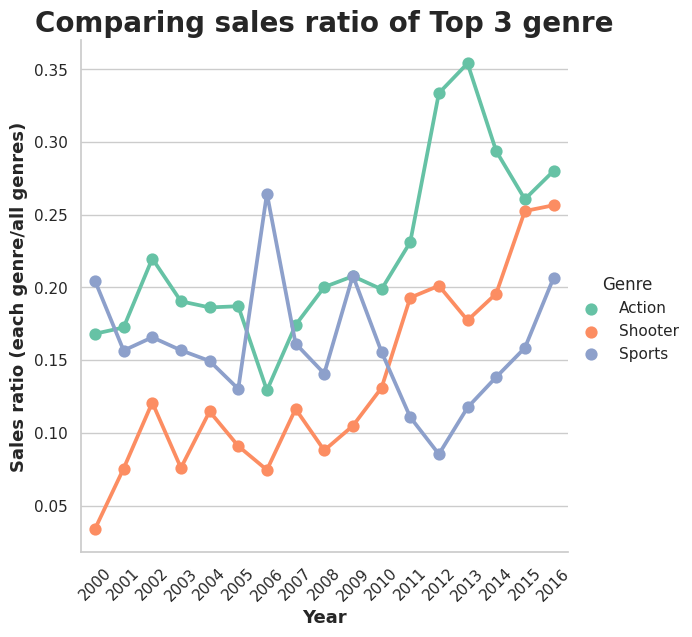

In [87]:
plt.figure(figsize=(40, 25))
sns.set_theme(style="whitegrid")

g = sns.catplot(x="Year", y="each/all ratio", hue="Genre", kind="point", palette = "Set2", data=ym_df, alpha=.6, height=6)
#plt.xticks(rotation=45)
plt.title("Comparing sales ratio of Top 3 genre",fontsize=20, fontweight = 'bold')
#plt.ylabel('Sales', fontsize='20', fontweight = 'bold')
#plt.xlabel('Year', fontsize='20', fontweight = 'bold')
#plt.ylim([0, 0.5])
g.set_xticklabels(rotation=45)
g.set_xlabels('Year', fontsize=13,fontweight = 'bold') # not set_label
g.set_ylabels('Sales ratio (each genre/all genres)', fontsize=13,fontweight = 'bold')
plt.show()




### (4) Year x  Platform  (Portable, PC, Home video ?) 

**Nothing special...**

sns.barplot

sns.catplot

In [88]:
df3 = df2
df3

Unnamed: 0                                            Name Platform  \
0               1                    Candace Kane's Candy Factory       DS   
1               2                                  The Munchables      Wii   
2               3  Otome wa Oanesama Boku ni Koi Shiteru Portable      PSP   
3               4                Deal or No Deal: Special Edition       DS   
4               5       Ben 10 Ultimate Alien: Cosmic Destruction      PS3   
...           ...                                             ...      ...   
16592       16593                                Minna no Chizu 2      PSP   
16593       16594                         Ice Age 2: The Meltdown       GC   
16594       16595                     Rainbow Islands: Revolution      PSP   
16595       16596                                        NBA 2K16      PS3   
16596       16597                     Toukiden: The Age of Demons      PSV   

       Year      Genre  ... NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
0      2008     Action  ...     0.04      0.00      0.00         0.00   
1      2009     Action  ...     0.17      0.00      0.00         0.01   
2      2010  Adventure  ...     0.00      0.00      0.02         0.00   
3      2010       Misc  ...     0.04      0.00      0.00         0.00   
4      2010   Platform  ...     0.12      0.09      0.00         0.04   
...     ...        ...  ...      ...       ...       ...          ...   
16592  2007       Misc  ...     0.00      0.00      0.02         0.00   
16593  2006   Platform  ...     0.15      0.04      0.00         0.01   
16594  2005     Action  ...     0.01      0.00      0.00         0.00   
16595  2015     Sports  ...     0.44      0.19      0.03         0.13   
16596  2013     Action  ...     0.05      0.05      0.25         0.03   

       Sales_sum  
0           0.04  
1           0.18  
2           0.02  
3           0.04  
4           0.25  
...          ...  
16592       0.02  
16593       0.20  
16594       0.01  
16595       0.79  
16596       0.38  

[14269 rows x 11 columns]

In [89]:
dfdf1 =[]
for a, y in enumerate(df3['Platform']):
    #year_max2_df['max/all ratio'][a]  = year_max2_df.loc[a]['sales'] / year_all_df[year_all_df['Year'] == y]['sales'].values
  if y == "DS" or y =="PSP" or y=="GBA"  or y=="3DS" or y=="PSV" or y=="GB" or y=="WS" or y== "GG":
    val = "portable"
    dfdf1.append(val)
  elif y == "PC":
    val = "pc"
    dfdf1.append(val)
  else: 
    val = "homevideo"
    dfdf1.append(val)

df3['pltf_type'] = dfdf1

df3.head()

Unnamed: 0                                            Name Platform  Year  \
0           1                    Candace Kane's Candy Factory       DS  2008   
1           2                                  The Munchables      Wii  2009   
2           3  Otome wa Oanesama Boku ni Koi Shiteru Portable      PSP  2010   
3           4                Deal or No Deal: Special Edition       DS  2010   
4           5       Ben 10 Ultimate Alien: Cosmic Destruction      PS3  2010   

       Genre  ... EU_Sales  JP_Sales  Other_Sales  Sales_sum  pltf_type  
0     Action  ...     0.00      0.00         0.00       0.04   portable  
1     Action  ...     0.00      0.00         0.01       0.18  homevideo  
2  Adventure  ...     0.00      0.02         0.00       0.02   portable  
3       Misc  ...     0.00      0.00         0.00       0.04   portable  
4   Platform  ...     0.09      0.00         0.04       0.25  homevideo  

[5 rows x 12 columns]

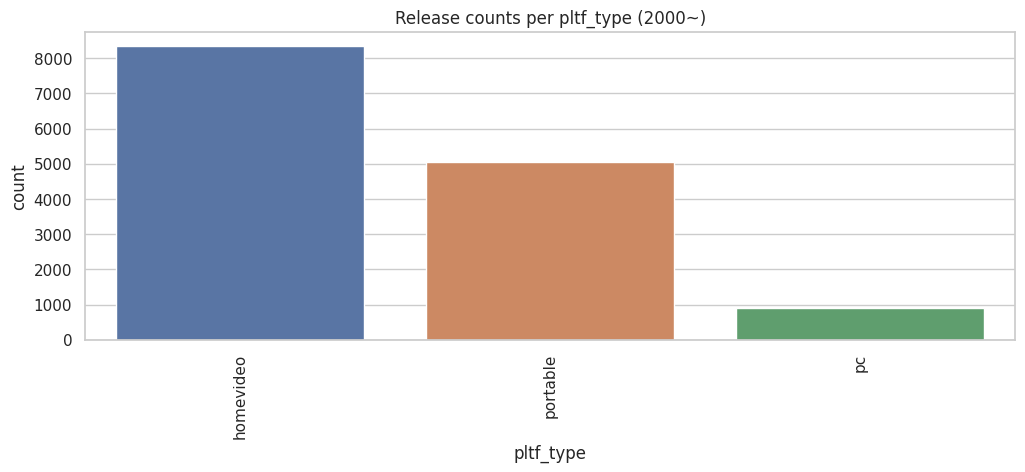

In [90]:


plt.figure(figsize=(12, 4))
sns.countplot(x="pltf_type", data=df3, order = df3['pltf_type'].value_counts().index)
plt.xticks(rotation=90)
plt.title("Release counts per pltf_type (2000~)")
plt.show()

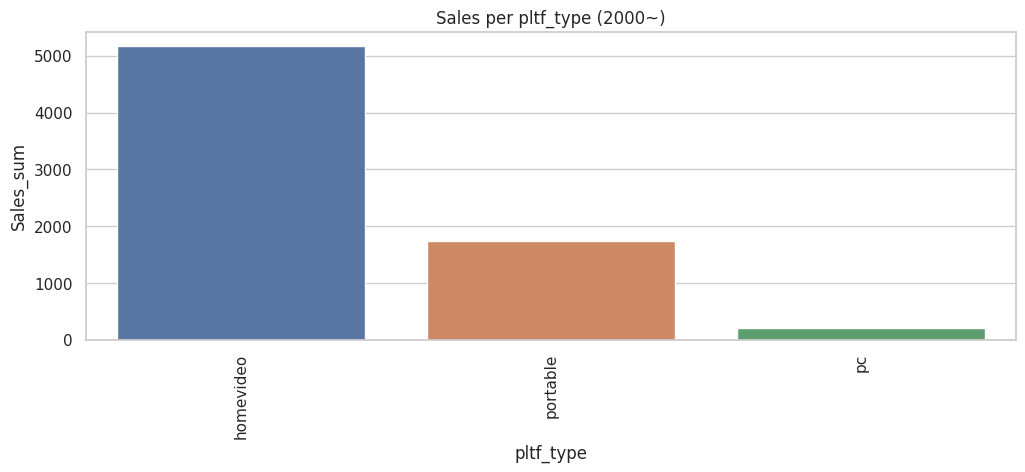

In [91]:
plt.figure(figsize=(12, 4))
Sales_pltf_type = df3.groupby(['pltf_type'])['Sales_sum'].sum().to_frame().sort_values(by="Sales_sum",ascending=False)
g = sns.barplot(x=Sales_pltf_type.index, y='Sales_sum', data=Sales_pltf_type, ci=None)
plt.xticks(rotation=90)
plt.title("Sales per pltf_type (2000~)")
plt.show()


In [92]:
Sales_pltf_type = df3.groupby(['Year','pltf_type'])['Sales_sum'].sum().to_frame().sort_values(by=["pltf_type","Year"],ascending=True).reset_index()
Sales_pltf_type

Year  pltf_type  Sales_sum
0   2000  homevideo     176.38
1   2001  homevideo     252.24
2   2002  homevideo     311.39
3   2003  homevideo     291.32
4   2004  homevideo     301.27
..   ...        ...        ...
46  2012   portable      88.85
47  2013   portable      59.29
48  2014   portable      58.12
49  2015   portable      34.16
50  2016   portable       9.90

[51 rows x 3 columns]

<Figure size 3000x2500 with 0 Axes>

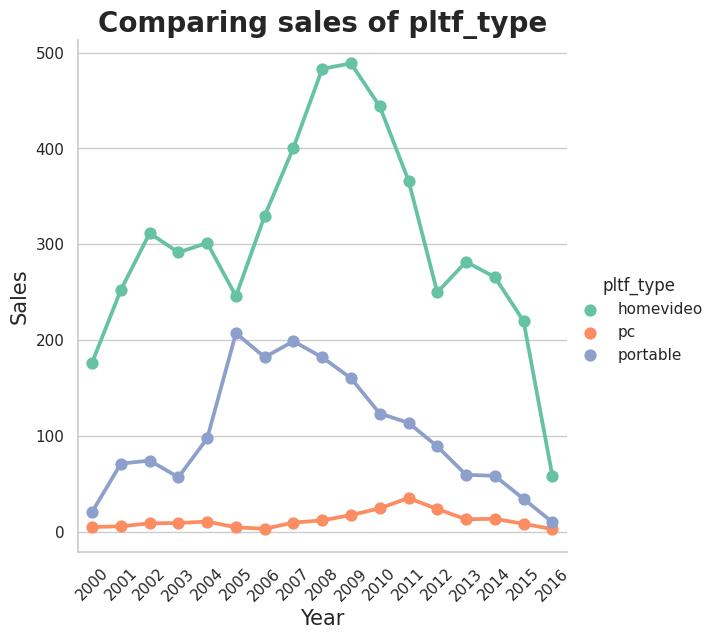

In [93]:
plt.figure(figsize=(30, 25))
sns.set_theme(style="whitegrid")

g= sns.catplot(x='Year', y="Sales_sum", hue="pltf_type", kind="point", palette = "Set2", data=Sales_pltf_type, alpha=.6, height=6)
#plt.xticks(rotation=45)
plt.title("Comparing sales of pltf_type",fontsize=20, fontweight = 'bold')
#plt.ylabel('Sales', fontsize='20', fontweight = 'bold')
#plt.xlabel('Year', fontsize='20', fontweight = 'bold')
#plt.ylim([0, 0.5])
g.set_xticklabels(rotation=45)
g.set_xlabels('Year', fontsize=15) # not set_label
g.set_ylabels('Sales', fontsize=15)
plt.show()


# [3] 출고량 높은 게임 분석 &&  @^%  %&&  @^%  %&&  @^%  %

Year x Genre 차트에서 출고량이 가장 많았던 Top 3 장르들의 게임분석 

### (0) Top 5 장르들의 출고량 높은 게임 분석


In [94]:
# Platform 상관없이 이름 겹치는 것들 모음 
df3_name_sales = df3.groupby(["Year","Name","Genre"])['Sales_sum','NA_Sales','EU_Sales','JP_Sales',	'Other_Sales'].sum().reset_index()
df4_name_sales = df3_name_sales.drop_duplicates()
#print(df4.shape)
#df4["Name"].value_counts().sum()
df5_name_sales=df4_name_sales.sort_values(by = 'Sales_sum',ascending=False)
# row 생략 없이 출력
pd.set_option('display.max_rows', 20)
# col 생략 없이 출력
pd.set_option('display.max_columns', 20)
df5_name_sales.head(20)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



Year                            Name       Genre  Sales_sum  NA_Sales  \
3837  2006                      Wii Sports      Sports      82.74     41.49   
9039  2013              Grand Theft Auto V      Action      37.77     16.64   
5255  2008                  Mario Kart Wii      Racing      35.83     15.85   
6763  2009               Wii Sports Resort      Sports      33.00     15.75   
7780  2011  Call of Duty: Modern Warfare 3     Shooter      30.84     15.58   
3550  2006           New Super Mario Bros.    Platform      30.01     11.38   
8523  2012      Call of Duty: Black Ops II     Shooter      29.73     14.08   
6890  2010         Call of Duty: Black Ops     Shooter      29.41     17.01   
3836  2006                        Wii Play        Misc      29.01     14.03   
6389  2009       New Super Mario Bros. Wii    Platform      28.61     14.59   
8956  2013            Call of Duty: Ghosts     Shooter      27.37     14.92   
9612  2015       Call of Duty: Black Ops 3     Shooter      25.30     11.89   
5917  2009  Call of Duty: Modern Warfare 2     Shooter      25.10     13.52   
2841  2005                      Nintendogs  Simulation      24.75      9.07   
2758  2005                   Mario Kart DS      Racing      23.43      9.81   
4728  2007                         Wii Fit      Sports      22.72      8.94   
6762  2009                    Wii Fit Plus      Sports      22.00      9.09   
9288  2014  Call of Duty: Advanced Warfare     Shooter      21.89     10.44   
7190  2010              Kinect Adventures!        Misc      21.82     14.97   
5067  2008             Grand Theft Auto IV      Action      21.61     11.52   

      EU_Sales  JP_Sales  Other_Sales  
3837     29.02      3.77         8.46  
9039     14.58      1.03         5.52  
5255     12.88      3.79         3.31  
6763     11.01      3.28         2.96  
7780     11.29      0.62         3.35  
3550      9.23      6.50         2.90  
8523     11.05      0.72         3.88  
6890      8.69      0.59         3.12  
3836      9.20      2.93         2.85  
6389      7.06      4.70         2.26  
8956      9.05      0.48         2.92  
9612      9.56      0.43         3.42  
5917      8.11      0.46         3.01  
2841     11.00      1.93         2.75  
2758      7.57      4.13         1.92  
4728      8.03      3.60         2.15  
6762      8.59      2.53         1.79  
9288      8.18      0.34         2.93  
7190      4.94      0.24         1.67  
5067      6.86      0.58         2.65

각 장르마다 인기 있는 게임들 모음 

In [95]:
# TOP 5 장르마다 인기 있는 게임들 모음 
df5_name_sales_action = df5_name_sales[df5_name_sales['Genre']== "Action"]
print(df5_name_sales_action.head(20))

df5_name_sales_sports = df5_name_sales[df5_name_sales['Genre']== "Sports"]
print(df5_name_sales_sports.head(20))

df5_name_sales_shooter = df5_name_sales[df5_name_sales['Genre']== "Shooter"]
print(df5_name_sales_shooter.head(20))

df5_name_sales_roleplaying = df5_name_sales[df5_name_sales['Genre']== "Role-Playing"]
print(df5_name_sales_roleplaying.head(20))


df5_name_sales_racing = df5_name_sales[df5_name_sales['Genre']== "Racing"]
#print(df5_name_sales_racing.head(20))


#df5_name_sales_misc = df5_name_sales[df5_name_sales['Genre']== "Misc"]
#print(df5_name_sales_misc.head(20))


      Year                                         Name   Genre  Sales_sum  \
9039  2013                           Grand Theft Auto V  Action      37.77   
5067  2008                          Grand Theft Auto IV  Action      21.61   
2120  2004                Grand Theft Auto: San Andreas  Action      20.81   
9369  2014                           Grand Theft Auto V  Action      17.07   
950   2002                  Grand Theft Auto: Vice City  Action      16.15   
8587  2012                               FIFA Soccer 13  Action      16.15   
4294  2007            LEGO Star Wars: The Complete Saga  Action      15.73   
8939  2013              Assassin's Creed IV: Black Flag  Action      13.20   
458   2001                         Grand Theft Auto III  Action      13.10   
8500  2012                         Assassin's Creed III  Action      13.10   
7417  2010                          Red Dead Redemption  Action      12.93   
6447  2009         Pokemon HeartGold/Pokemon SoulSilver  Action 

## (0) 각 장르마다 인기있는 게임들의 sales data 세팅

In [96]:
action1 = df5_name_sales[df5_name_sales['Name'].str.contains('Grand Theft Auto')]
action0 =df5_name_sales[~df5_name_sales['Name'].str.contains('Grand Theft Auto')]
action0 = action0[action0['Genre'] == 'Action']

print(action1['Sales_sum'].sum())
print(action1['NA_Sales'].sum())
print(action1['EU_Sales'].sum())
print(action1['JP_Sales'].sum())
print(action1['Other_Sales'].sum())
action1

154.89
71.82000000000001
50.529999999999994
3.7300000000000004
28.81


Year                                               Name   Genre  \
9039  2013                                 Grand Theft Auto V  Action   
5067  2008                                Grand Theft Auto IV  Action   
2120  2004                      Grand Theft Auto: San Andreas  Action   
9369  2014                                 Grand Theft Auto V  Action   
950   2002                        Grand Theft Auto: Vice City  Action   
458   2001                               Grand Theft Auto III  Action   
2668  2005             Grand Theft Auto: Liberty City Stories  Action   
3347  2006                Grand Theft Auto: Vice City Stories  Action   
1763  2003  Rockstar Games Double Pack: Grand Theft Auto I...  Action   
3346  2006             Grand Theft Auto: Liberty City Stories  Action   
2669  2005                      Grand Theft Auto: San Andreas  Action   
6120  2009                   Grand Theft Auto: Chinatown Wars  Action   
9693  2015                                 Grand Theft Auto V  Action   
4173  2007                Grand Theft Auto: Vice City Stories  Action   
2119  2004                                   Grand Theft Auto  Action   
5068  2008                      Grand Theft Auto: San Andreas  Action   
1560  2003                        Grand Theft Auto: Vice City  Action   
949   2002                               Grand Theft Auto III  Action   

      Sales_sum  NA_Sales  EU_Sales  JP_Sales  Other_Sales  
9039      37.77     16.64     14.58      1.03         5.52  
5067      21.61     11.52      6.86      0.58         2.65  
2120      20.81      9.43      0.40      0.41        10.57  
9369      17.07      6.46      7.82      0.36         2.43  
950       16.15      8.41      5.49      0.47         1.78  
458       13.10      6.99      4.51      0.30         1.30  
2668       7.72      2.90      2.83      0.24         1.75  
3347       5.09      1.70      2.02      0.16         1.21  
1763       4.22      2.69      1.22      0.00         0.31  
3346       3.53      1.56      1.40      0.07         0.50  
2669       2.93      1.26      1.53      0.00         0.14  
6120       2.44      0.87      1.07      0.08         0.42  
9693       1.08      0.36      0.64      0.00         0.08  
4173       0.97      0.78      0.03      0.03         0.13  
2119       0.23      0.17      0.06      0.00         0.00  
5068       0.12      0.08      0.03      0.00         0.01  
1560       0.04      0.00      0.03      0.00         0.01  
949        0.01      0.00      0.01      0.00         0.00

In [97]:
sports2 = df5_name_sales[df5_name_sales['Name'].str.contains('Wii Sports')]

print(sports2['Sales_sum'].sum())
print(sports2['NA_Sales'].sum())
print(sports2['EU_Sales'].sum())
print(sports2['JP_Sales'].sum())
print(sports2['Other_Sales'].sum())
sports2

116.14000000000001
57.43
40.17
7.09
11.450000000000001


Year               Name   Genre  Sales_sum  NA_Sales  EU_Sales  \
3837  2006         Wii Sports  Sports      82.74     41.49     29.02   
6763  2009  Wii Sports Resort  Sports      33.00     15.75     11.01   
9563  2014    Wii Sports Club  Sports       0.40      0.19      0.14   

      JP_Sales  Other_Sales  
3837      3.77         8.46  
6763      3.28         2.96  
9563      0.04         0.03

In [98]:
sports1 = df5_name_sales[df5_name_sales['Name'].str.contains('FIFA')]
sports0 = df5_name_sales[~df5_name_sales['Name'].str.contains('FIFA')]
sports0 = sports0[sports0['Genre'] == 'Sports']

print(sports1['Sales_sum'].sum())
print(sports1['NA_Sales'].sum())
print(sports1['EU_Sales'].sum())
print(sports1['JP_Sales'].sum())
print(sports1['Other_Sales'].sum())

sports1

166.70999999999998
32.49
100.77000000000001
2.2
31.249999999999996


Year                                Name   Genre  Sales_sum  NA_Sales  \
9341  2014                             FIFA 15  Sports      19.02      3.20   
9012  2013                             FIFA 14  Sports      17.16      2.84   
9664  2015                             FIFA 16  Sports      16.43      2.98   
8587  2012                      FIFA Soccer 13  Action      16.15      2.64   
7898  2011                             FIFA 12  Sports      13.14      2.08   
...    ...                                 ...     ...        ...       ...   
1141  2002              Project FIFA World Cup  Sports       0.10      0.00   
100   2000      FIFA 2001: Major League Soccer  Sports       0.09      0.00   
920   2002  FIFA Soccer 2003 (weekly jp sales)  Sports       0.04      0.00   
7899  2011                     FIFA Manager 12  Sports       0.04      0.00   
3295  2006        FIFA World Cup: Germany 2006  Sports       0.03      0.02   

      EU_Sales  JP_Sales  Other_Sales  
9341     12.40      0.13         3.29  
9012     11.14      0.20         2.98  
9664     11.29      0.11         2.05  
8587     10.25      0.23         3.03  
7898      8.50      0.15         2.41  
...        ...       ...          ...  
1141      0.00      0.10         0.00  
100       0.00      0.09         0.00  
920       0.00      0.04         0.00  
7899      0.03      0.00         0.01  
3295      0.01      0.00         0.00  

[36 rows x 8 columns]

In [99]:
shooter1 = df5_name_sales[df5_name_sales['Name'].str.contains('Call of Duty')]
shooter0 = df5_name_sales[~df5_name_sales['Name'].str.contains('Call of Duty')]
shooter0 = shooter0[shooter0['Genre'] == 'Shooter']
print(shooter0['Sales_sum'].sum())
print(shooter0['NA_Sales'].sum())
print(shooter0['EU_Sales'].sum())
print(shooter0['JP_Sales'].sum())
print(shooter0['Other_Sales'].sum())
shooter0

654.24
358.06000000000006
208.19
18.65
69.34


Year                                       Name    Genre  Sales_sum  \
7752  2011                              Battlefield 3  Shooter      17.37   
8947  2013                              Battlefield 4  Shooter      14.04   
9310  2014                                    Destiny  Shooter      12.61   
4186  2007                                     Halo 3  Shooter      12.14   
9852  2015               Star Wars Battlefront (2015)  Shooter      11.70   
...    ...                                        ...      ...        ...   
8992  2013                     DoDonPachi Saidaioujou  Shooter       0.01   
1436  2003  CT Special Forces 2: Back in the Trenches  Shooter       0.01   
1398  2003  Army Men: Air Combat - The Elite Missions  Shooter       0.01   
3190  2006                             Call of Juarez  Shooter       0.01   
8955  2013                                  Caladrius  Shooter       0.01   

      NA_Sales  EU_Sales  JP_Sales  Other_Sales  
7752      8.20      6.49      0.41         2.27  
8947      6.41      5.57      0.46         1.60  
9310      6.59      4.12      0.28         1.62  
4186      7.97      2.83      0.13         1.21  
9852      5.00      4.88      0.24         1.58  
...        ...       ...       ...          ...  
8992      0.00      0.00      0.01         0.00  
1436      0.01      0.00      0.00         0.00  
1398      0.01      0.00      0.00         0.00  
3190      0.00      0.01      0.00         0.00  
8955      0.00      0.00      0.01         0.00  

[690 rows x 8 columns]

In [100]:
target_str = ['Pok','mon']
roleplaying1 =df5_name_sales[df5_name_sales['Name'].map(lambda x: all(string in x for string in target_str))]
roleplaying1 = roleplaying1[roleplaying1['Genre'] == 'Role-Playing']
print(roleplaying1['Sales_sum'].sum())
print(roleplaying1['NA_Sales'].sum())
print(roleplaying1['EU_Sales'].sum())
print(roleplaying1['JP_Sales'].sum())
print(roleplaying1['Other_Sales'].sum())
roleplaying1

126.77999999999999
49.529999999999994
29.580000000000002
40.43999999999999
7.2299999999999995


Year                                               Name         Genre  \
3592  2006                      Pokemon Diamond/Pokemon Pearl  Role-Playing   
1135  2002                      Pokemon Ruby/Pokemon Sapphire  Role-Playing   
7384  2010                        Pokemon Black/Pokemon White  Role-Playing   
9468  2014          Pokemon Omega Ruby/Pokemon Alpha Sapphire  Role-Playing   
2260  2004                  Pokemon FireRed/Pokemon LeafGreen  Role-Playing   
...    ...                                                ...           ...   
8766  2012         Pokemon Mystery Dungeon: Gates to Infinity  Role-Playing   
2864  2005                       Pokemon XD: Gale of Darkness  Role-Playing   
9798  2015                      Pokemon Super Mystery Dungeon  Role-Playing   
2866  2005  PokÃ©mon Mystery Dungeon: Red Rescue Team (US ...  Role-Playing   
8765  2012                                   Pokemon Conquest  Role-Playing   

      Sales_sum  NA_Sales  EU_Sales  JP_Sales  Other_Sales  
3592      18.35      6.42      4.52      6.04         1.37  
1135      15.84      6.06      3.90      5.38         0.50  
7384      15.32      5.57      3.28      5.65         0.82  
9468      11.33      4.23      3.37      3.08         0.65  
2260      10.49      4.34      2.65      3.15         0.35  
...         ...       ...       ...       ...          ...  
8766       1.27      0.44      0.30      0.47         0.06  
2864       1.24      0.71      0.19      0.31         0.03  
9798       1.18      0.46      0.31      0.33         0.08  
2866       1.13      0.81      0.30      0.00         0.02  
8765       1.05      0.58      0.06      0.37         0.04  

[23 rows x 8 columns]

In [101]:
racing1 = df5_name_sales[df5_name_sales['Name'].str.contains('Mario')]
racing1 = racing1[racing1['Genre'] == 'Racing']
print(racing1['Sales_sum'].sum())
print(racing1['NA_Sales'].sum())
print(racing1['EU_Sales'].sum())
print(racing1['JP_Sales'].sum())
print(racing1['Other_Sales'].sum())
racing1

90.86
40.269999999999996
29.840000000000003
13.719999999999999
7.030000000000001


Year                       Name   Genre  Sales_sum  NA_Sales  EU_Sales  \
5255  2008             Mario Kart Wii  Racing      35.83     15.85     12.88   
2758  2005              Mario Kart DS  Racing      23.43      9.81      7.57   
8072  2011               Mario Kart 7  Racing      12.21      4.74      3.91   
9429  2014               Mario Kart 8  Racing       6.96      3.13      2.07   
1634  2003  Mario Kart: Double Dash!!  Racing       6.95      4.12      1.77   
528   2001  Mario Kart: Super Circuit  Racing       5.48      2.62      1.64   

      JP_Sales  Other_Sales  
5255      3.79         3.31  
2758      4.13         1.92  
8072      2.67         0.89  
9429      1.27         0.49  
1634      0.87         0.19  
528       0.99         0.23

In [102]:
Top_games_a = pd.DataFrame({'Genre': ['Action','Sports','Shooter','Role-Playing','Racing'],
                        'Ranking': [1,2,3,4,5 ],
                         'Name': ['GTA','FIFA','Call of Duty','Pokemon','Mario Kart'],
                         'Total sales': [action1['Sales_sum'].sum(),sports1['Sales_sum'].sum(),shooter1['Sales_sum'].sum(),roleplaying1['Sales_sum'].sum(),racing1['Sales_sum'].sum() ],
                        }) 

In [103]:
Top_games_a

Genre  Ranking          Name  Total sales
0        Action        1           GTA       154.89
1        Sports        2          FIFA       166.71
2       Shooter        3  Call of Duty       243.54
3  Role-Playing        4       Pokemon       126.78
4        Racing        5    Mario Kart        90.86

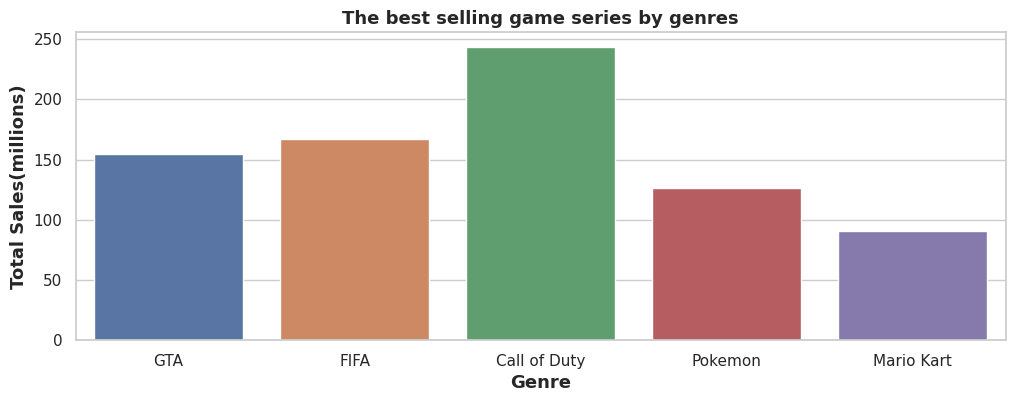

In [104]:
plt.figure(figsize=(12, 4))
g = sns.barplot(x='Name', y='Total sales', data=Top_games_a, ci=None)
plt.xticks(rotation=0)
plt.ylabel('Total Sales(millions)',fontsize = 13, fontweight = 'bold')
plt.xlabel('Genre',fontsize = 13, fontweight = 'bold')

plt.title("The best selling game series by genres",fontsize = 13, fontweight = 'bold')
plt.show()

## (1) 각 장르별 인기 게임 


연도 별 각 시리지들의 이름을 다 같게 세팅하고, 연도별 판매량 합쳐놓기 

In [105]:
action1.head()

Year                           Name   Genre  Sales_sum  NA_Sales  \
9039  2013             Grand Theft Auto V  Action      37.77     16.64   
5067  2008            Grand Theft Auto IV  Action      21.61     11.52   
2120  2004  Grand Theft Auto: San Andreas  Action      20.81      9.43   
9369  2014             Grand Theft Auto V  Action      17.07      6.46   
950   2002    Grand Theft Auto: Vice City  Action      16.15      8.41   

      EU_Sales  JP_Sales  Other_Sales  
9039     14.58      1.03         5.52  
5067      6.86      0.58         2.65  
2120      0.40      0.41        10.57  
9369      7.82      0.36         2.43  
950       5.49      0.47         1.78

In [106]:
sports1.head()

Year            Name   Genre  Sales_sum  NA_Sales  EU_Sales  JP_Sales  \
9341  2014         FIFA 15  Sports      19.02      3.20     12.40      0.13   
9012  2013         FIFA 14  Sports      17.16      2.84     11.14      0.20   
9664  2015         FIFA 16  Sports      16.43      2.98     11.29      0.11   
8587  2012  FIFA Soccer 13  Action      16.15      2.64     10.25      0.23   
7898  2011         FIFA 12  Sports      13.14      2.08      8.50      0.15   

      Other_Sales  
9341         3.29  
9012         2.98  
9664         2.05  
8587         3.03  
7898         2.41

In [107]:
shooter1.head()

Year                            Name    Genre  Sales_sum  NA_Sales  \
7780  2011  Call of Duty: Modern Warfare 3  Shooter      30.84     15.58   
8523  2012      Call of Duty: Black Ops II  Shooter      29.73     14.08   
6890  2010         Call of Duty: Black Ops  Shooter      29.41     17.01   
8956  2013            Call of Duty: Ghosts  Shooter      27.37     14.92   
9612  2015       Call of Duty: Black Ops 3  Shooter      25.30     11.89   

      EU_Sales  JP_Sales  Other_Sales  
7780     11.29      0.62         3.35  
8523     11.05      0.72         3.88  
6890      8.69      0.59         3.12  
8956      9.05      0.48         2.92  
9612      9.56      0.43         3.42

In [108]:
roleplaying1.head()

Year                                       Name         Genre  \
3592  2006              Pokemon Diamond/Pokemon Pearl  Role-Playing   
1135  2002              Pokemon Ruby/Pokemon Sapphire  Role-Playing   
7384  2010                Pokemon Black/Pokemon White  Role-Playing   
9468  2014  Pokemon Omega Ruby/Pokemon Alpha Sapphire  Role-Playing   
2260  2004          Pokemon FireRed/Pokemon LeafGreen  Role-Playing   

      Sales_sum  NA_Sales  EU_Sales  JP_Sales  Other_Sales  
3592      18.35      6.42      4.52      6.04         1.37  
1135      15.84      6.06      3.90      5.38         0.50  
7384      15.32      5.57      3.28      5.65         0.82  
9468      11.33      4.23      3.37      3.08         0.65  
2260      10.49      4.34      2.65      3.15         0.35

In [109]:
racing1.head()

Year                       Name   Genre  Sales_sum  NA_Sales  EU_Sales  \
5255  2008             Mario Kart Wii  Racing      35.83     15.85     12.88   
2758  2005              Mario Kart DS  Racing      23.43      9.81      7.57   
8072  2011               Mario Kart 7  Racing      12.21      4.74      3.91   
9429  2014               Mario Kart 8  Racing       6.96      3.13      2.07   
1634  2003  Mario Kart: Double Dash!!  Racing       6.95      4.12      1.77   

      JP_Sales  Other_Sales  
5255      3.79         3.31  
2758      4.13         1.92  
8072      2.67         0.89  
9429      1.27         0.49  
1634      0.87         0.19

In [110]:
action1['Name'] = 'GTA'
action1_year = action1.groupby(['Year','Genre','Name'])['Sales_sum','NA_Sales','EU_Sales','JP_Sales','Other_Sales'].sum().reset_index()
#action1_year.head()

sports1['Name'] = 'FIFA'
sports1['Genre'] = 'Sports'

sports1_year = sports1.groupby(['Year','Genre','Name'])['Sales_sum','NA_Sales','EU_Sales','JP_Sales','Other_Sales'].sum().reset_index()
#sports1_year.head()

shooter1['Name'] = 'Call of Duty'
shooter1['Genre'] = 'Shooter'
shooter1_year = shooter1.groupby(['Year','Genre','Name'])['Sales_sum','NA_Sales','EU_Sales','JP_Sales','Other_Sales'].sum().reset_index()
#shooter1_year.head()

roleplaying1['Name'] = 'Pokemon'
roleplaying1_year = roleplaying1.groupby(['Year','Genre','Name'])['Sales_sum','NA_Sales','EU_Sales','JP_Sales','Other_Sales'].sum().reset_index()
#roleplaying1_year.head()

racing1['Name'] = 'Mario Kart'
racing1_year = racing1.groupby(['Year','Genre','Name'])['Sales_sum','NA_Sales','EU_Sales','JP_Sales','Other_Sales'].sum().reset_index()
#racing1_year.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is 

In [111]:
Top_games_2 = pd.concat([action1_year,sports1_year,shooter1_year,roleplaying1_year,racing1_year], ignore_index = True)

# row 생략 없이 출력
pd.set_option('display.max_rows', 12)
# col 생략 없이 출력
pd.set_option('display.max_columns', 12)
Top_games_2

Year   Genre        Name  Sales_sum  NA_Sales  EU_Sales  JP_Sales  \
0   2001  Action         GTA      13.10      6.99      4.51      0.30   
1   2002  Action         GTA      16.16      8.41      5.50      0.47   
2   2003  Action         GTA       4.26      2.69      1.25      0.00   
3   2004  Action         GTA      21.04      9.60      0.46      0.41   
4   2005  Action         GTA      10.65      4.16      4.36      0.24   
..   ...     ...         ...        ...       ...       ...       ...   
56  2003  Racing  Mario Kart       6.95      4.12      1.77      0.87   
57  2005  Racing  Mario Kart      23.43      9.81      7.57      4.13   
58  2008  Racing  Mario Kart      35.83     15.85     12.88      3.79   
59  2011  Racing  Mario Kart      12.21      4.74      3.91      2.67   
60  2014  Racing  Mario Kart       6.96      3.13      2.07      1.27   

    Other_Sales  
0          1.30  
1          1.78  
2          0.32  
3         10.57  
4          1.89  
..          ...  
56         0.19  
57         1.92  
58         3.31  
59         0.89  
60         0.49  

[61 rows x 8 columns]

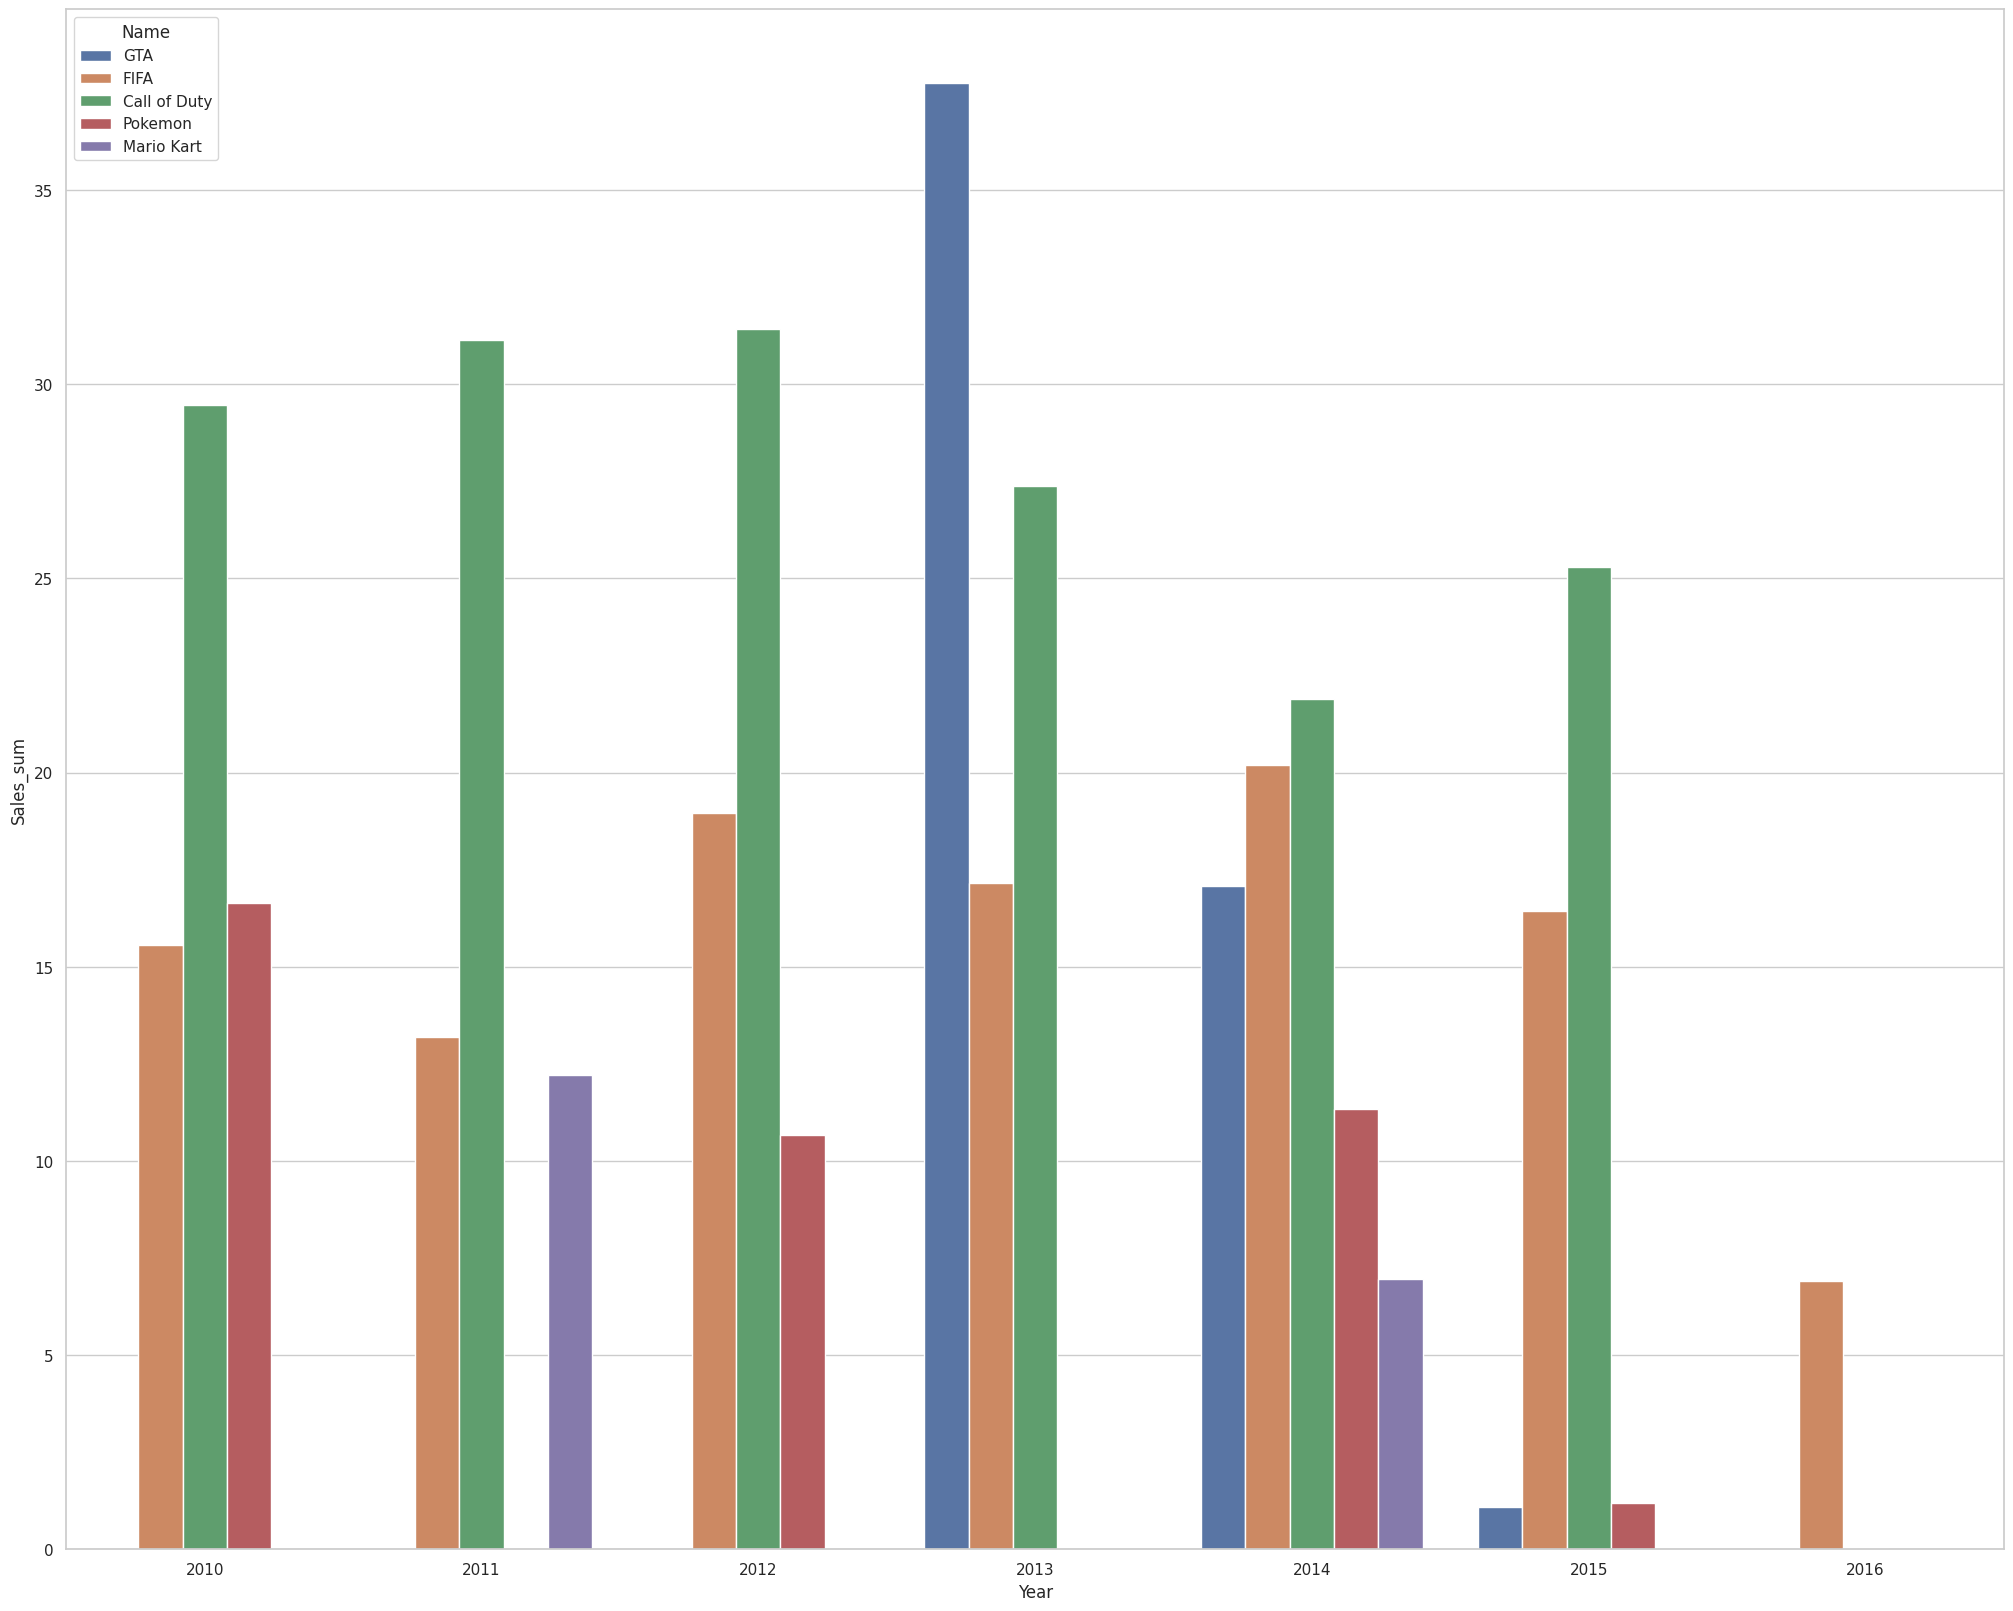

In [112]:
data = Top_games_2[Top_games_2['Year'] >= 2010]

plt.figure(figsize=(25, 20))
sns.set_theme(style="whitegrid")
ax = sns.barplot(x="Year", y="Sales_sum", hue="Name", data=data)


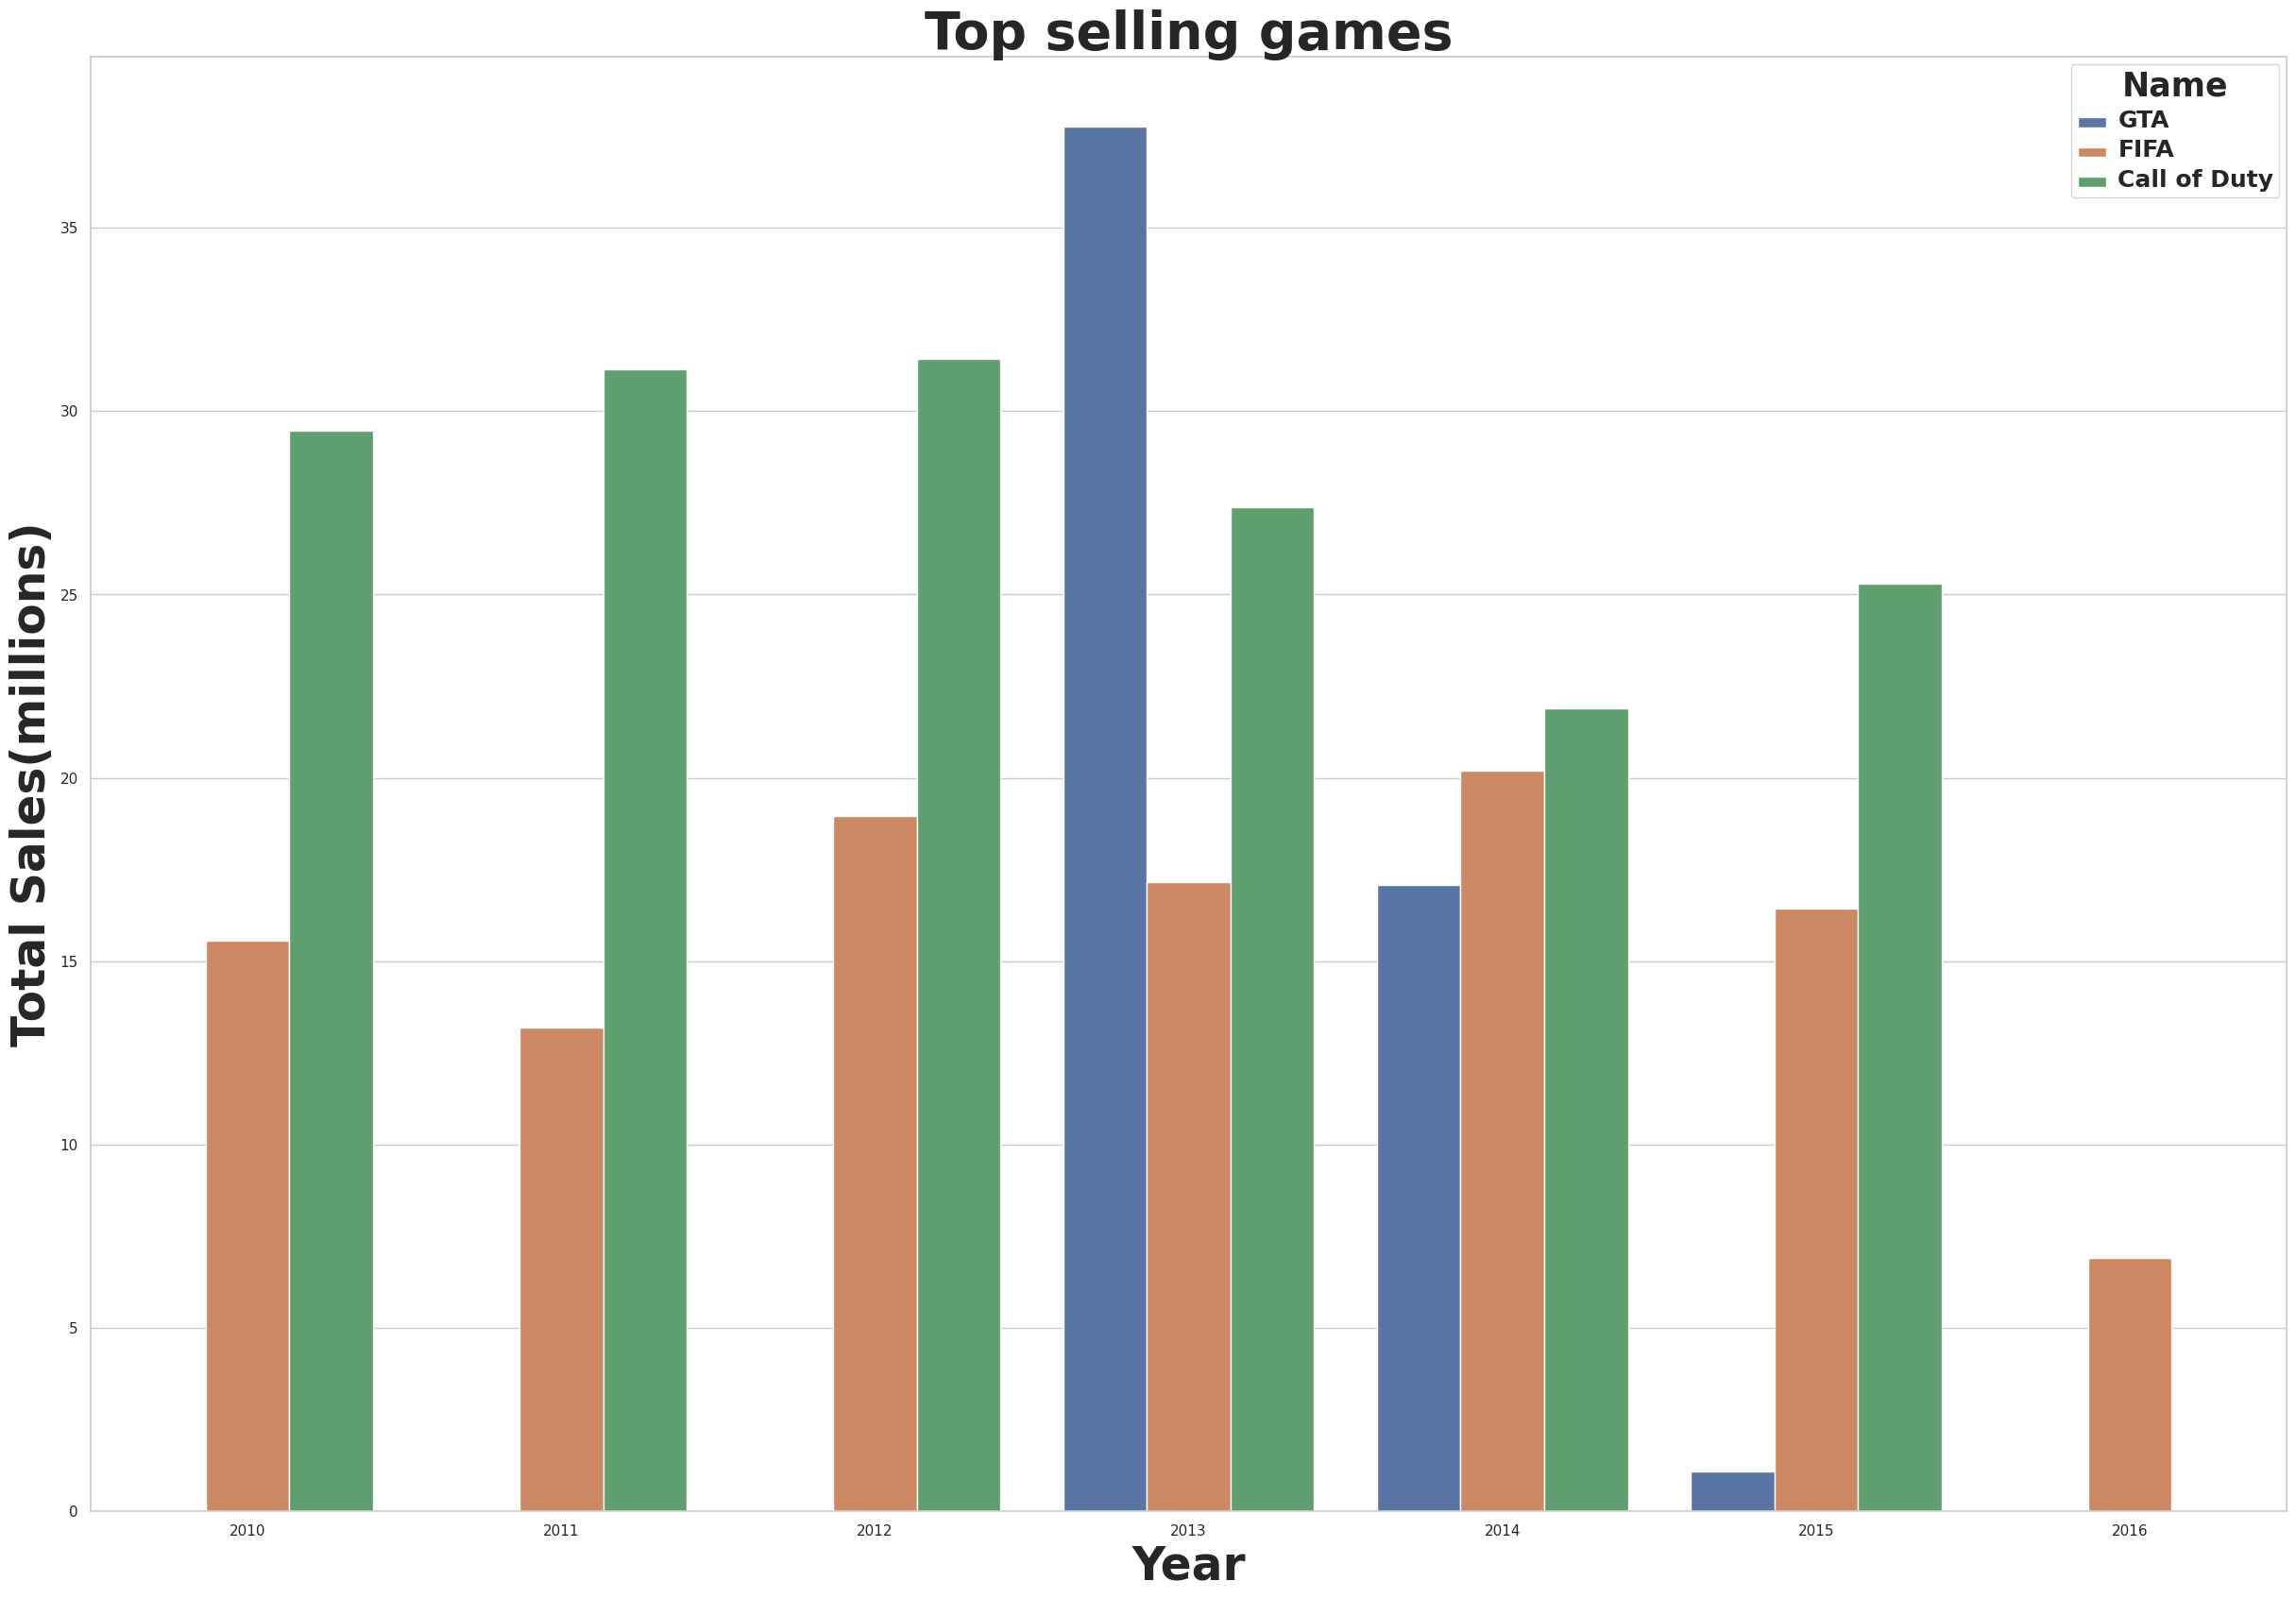

<Figure size 3000x2000 with 0 Axes>

In [113]:
# 위 그래프 결과, Mario kart와 Pokemon은 2010년도 들어서 출시가 별로 없음. 
Top_games_3 = pd.concat([action1_year,sports1_year,shooter1_year], ignore_index = True)

data = Top_games_3[Top_games_3['Year'] >= 2010]
fig, ax = plt.subplots(figsize=[30,20])

plt.figure(figsize=(30, 20))
sns.set_theme(style="whitegrid")
ax1 = sns.barplot(ax= ax,x="Year", y="Sales_sum", hue="Name", data=data)
ax1.set_ylabel('Total Sales(millions)', fontsize = 35, fontweight = 'bold')
ax1.set_xlabel('Year', fontsize = 35, fontweight = 'bold')
sns.set(font_scale=3)
#ax1.set(title='Top selling games')
ax1.set_title('Top selling games', fontsize = 40, fontweight = 'bold')

plt.setp(ax.get_legend().get_texts(), fontsize='18', fontweight = 'bold') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='25', fontweight = 'bold') # for legend title
plt.show()

In [114]:
df6_acton = df5_name_sales[df5_name_sales['Genre'] == 'Action' ]
df6_sports = df5_name_sales[df5_name_sales['Genre'] == 'Sports' ]
df6_shooter = df5_name_sales[ df5_name_sales['Genre'] == 'Shooter']
df6 =pd.concat([df6_acton,df6_sports,df6_shooter], ignore_index = True)
df6_name_sales=df6.sort_values(by = 'Sales_sum',ascending=False)


# row 생략 없이 출력
pd.set_option('display.max_rows', None)
# col 생략 없이 출력
pd.set_option('display.max_columns', None)
df6_name_sales

Year                                               Name    Genre  \
1808  2006                                         Wii Sports   Sports   
0     2013                                 Grand Theft Auto V   Action   
1809  2009                                  Wii Sports Resort   Sports   
2933  2011                     Call of Duty: Modern Warfare 3  Shooter   
2934  2012                         Call of Duty: Black Ops II  Shooter   
2935  2010                            Call of Duty: Black Ops  Shooter   
2936  2013                               Call of Duty: Ghosts  Shooter   
2937  2015                          Call of Duty: Black Ops 3  Shooter   
2938  2009                     Call of Duty: Modern Warfare 2  Shooter   
1810  2007                                            Wii Fit   Sports   
1811  2009                                       Wii Fit Plus   Sports   
2939  2014                     Call of Duty: Advanced Warfare  Shooter   
1     2008                                Grand Theft Auto IV   Action   
2     2004                      Grand Theft Auto: San Andreas   Action   
1812  2014                                            FIFA 15   Sports   
2940  2007                     Call of Duty 4: Modern Warfare  Shooter   
2941  2011                                      Battlefield 3  Shooter   
1813  2013                                            FIFA 14   Sports   
3     2014                                 Grand Theft Auto V   Action   
1814  2015                                            FIFA 16   Sports   
4     2002                        Grand Theft Auto: Vice City   Action   
5     2012                                     FIFA Soccer 13   Action   
2942  2008                         Call of Duty: World at War  Shooter   
6     2007                  LEGO Star Wars: The Complete Saga   Action   
2943  2013                                      Battlefield 4  Shooter   
7     2013                    Assassin's Creed IV: Black Flag   Action   
1815  2011                                            FIFA 12   Sports   
9     2012                               Assassin's Creed III   Action   
8     2001                               Grand Theft Auto III   Action   
10    2010                                Red Dead Redemption   Action   
2944  2014                                            Destiny  Shooter   
1816  2010                                     FIFA Soccer 11   Sports   
2945  2007                                             Halo 3  Shooter   
11    2009               Pokemon HeartGold/Pokemon SoulSilver   Action   
2946  2015                       Star Wars Battlefront (2015)  Shooter   
12    2009                                Assassin's Creed II   Action   
13    2011                                Batman: Arkham City   Action   
1817  2009                                     FIFA Soccer 10   Sports   
14    2008                     Star Wars: The Force Unleashed   Action   
2947  2010                                        Halo: Reach  Shooter   
15    2013                           LEGO Marvel Super Heroes   Action   
1818  2010                                      Zumba Fitness   Sports   
2948  2012                                             Halo 4  Shooter   
16    2008        LEGO Indiana Jones: The Original Adventures   Action   
1819  2007                                     FIFA Soccer 08   Sports   
17    2014                                         Watch Dogs   Action   
1820  2006                                      Madden NFL 07   Sports   
18    2011                      Assassin's Creed: Revelations   Action   
19    2008                         LEGO Batman: The Videogame   Action   
2949  2002                          Medal of Honor: Frontline  Shooter   
20    2006             The Legend of Zelda: Twilight Princess   Action   
21    2009                                    Resident Evil 5   Action   
2950  2014                                          Far Cry 4  Shooter   
1821  2008

## (2) 2013,2014,2015 년도 GTA와 Call of duty가 나머지 장르의 분포와 다른지 확인 카이제곱 검정 




### (0) 데이터 준비

In [115]:
action1['Name'] = 'GTA'
action1_year = action1.groupby(['Year','Genre','Name'])['Sales_sum','NA_Sales','EU_Sales','JP_Sales','Other_Sales'].sum().reset_index()
#action1_year.head()

sports1['Name'] = 'FIFA'
sports1['Genre'] = 'Sports'

sports1_year = sports1.groupby(['Year','Genre','Name'])['Sales_sum','NA_Sales','EU_Sales','JP_Sales','Other_Sales'].sum().reset_index()
#sports1_year.head()

shooter1['Name'] = 'Call of Duty'
shooter1['Genre'] = 'Shooter'
shooter1_year = shooter1.groupby(['Year','Genre','Name'])['Sales_sum','NA_Sales','EU_Sales','JP_Sales','Other_Sales'].sum().reset_index()
#shooter1_year.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is 

In [116]:
action0['Name'] = 'None GTA'
action0['Genre'] = 'Action'

action0_year = action0.groupby(['Year','Genre','Name'])['Sales_sum','NA_Sales','EU_Sales','JP_Sales','Other_Sales'].sum().reset_index()
#action1_year.head()

sports0['Name'] = 'None FIFA'
sports0['Genre'] = 'Sports'
sports0_year = sports0.groupby(['Year','Genre','Name'])['Sales_sum','NA_Sales','EU_Sales','JP_Sales','Other_Sales'].sum().reset_index()
#sports1_year.head()

shooter0['Name'] = 'None Call of Duty'
shooter0['Genre'] = 'Shooter'
shooter0_year = shooter0.groupby(['Year','Genre','Name'])['Sales_sum','NA_Sales','EU_Sales','JP_Sales','Other_Sales'].sum().reset_index()
#shooter1_year.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



### (1) 독립성 검정 (이원카이제곱) 

In [117]:
shooter0_year.head()

Year    Genre               Name  Sales_sum  NA_Sales  EU_Sales  JP_Sales  \
0  2000  Shooter  None Call of Duty       6.83      4.00      2.17      0.20   
1  2001  Shooter  None Call of Duty      24.81     15.11      7.50      0.53   
2  2002  Shooter  None Call of Duty      47.64     28.11     14.76      1.02   
3  2003  Shooter  None Call of Duty      27.10     16.12      8.54      0.21   
4  2004  Shooter  None Call of Duty      42.42     27.73     11.15      0.64   

   Other_Sales  
0         0.46  
1         1.67  
2         3.75  
3         2.23  
4         2.90

In [118]:
action_y= list(action1_year[action1_year['Year']==2013]['Sales_sum']) +list(action1_year[action1_year['Year']==2014]['Sales_sum'])+list(action1_year[action1_year['Year']==2015]['Sales_sum'])
action_n= list(action0_year[action0_year['Year']==2013]['Sales_sum']) +list(action0_year[action0_year['Year']==2014]['Sales_sum'])+list(action0_year[action0_year['Year']==2015]['Sales_sum'])

In [119]:
shooter_y= list(shooter1_year[shooter1_year['Year']==2013]['Sales_sum']) + list(shooter1_year[shooter1_year['Year']==2014]['Sales_sum']) + list(shooter1_year[shooter1_year['Year']==2015]['Sales_sum'])
shooter_n= list(shooter0_year[shooter0_year['Year']==2013]['Sales_sum']) + list(shooter0_year[shooter0_year['Year']==2014]['Sales_sum']) + list(shooter0_year[shooter0_year['Year']==2015]['Sales_sum'])

In [120]:
test_action = pd.DataFrame([action_n,action_y], columns=['2013','2014','2015'], index=['action_n','action_y'])
test_action

2013   2014   2015
action_n  87.44  81.94  67.17
action_y  37.77  17.07   1.08

In [121]:
test_shooter = pd.DataFrame([shooter_n,shooter_y], columns=['2013','2014','2015'], index=['shooter_n','shooter_y'])
test_shooter

2013   2014   2015
shooter_n  35.36  44.10  40.82
shooter_y  27.37  21.89  25.30

In [122]:
df_shooter = pd.DataFrame({'call of Duty': ['Included', 'Not included','Included', 'Not included','Included', 'Not included'], 
                            'Year':[2013,2013,2014,2014,2015,2015], 
                            'Total sales (millions)': list(test_shooter.melt().value)})

df_shooter



call of Duty  Year  Total sales (millions)
0      Included  2013                   35.36
1  Not included  2013                   27.37
2      Included  2014                   44.10
3  Not included  2014                   21.89
4      Included  2015                   40.82
5  Not included  2015                   25.30

In [123]:
df_action = pd.DataFrame({'GTA': ['Included', 'Not included','Included', 'Not included','Included', 'Not included'], 
                            'Year':[2013,2013,2014,2014,2015,2015], 
                            'Total sales (millions)': list(test_action.melt().value)})

df_action

GTA  Year  Total sales (millions)
0      Included  2013                   87.44
1  Not included  2013                   37.77
2      Included  2014                   81.94
3  Not included  2014                   17.07
4      Included  2015                   67.17
5  Not included  2015                    1.08

### (1)-1 독립성 검정 (이원카이제곱검정)  -GTA vs non GTA

In [124]:
# GTA vs non GTA 독립성검정(카이제곱검정)
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency([action_n,action_y])

msg = 'Test Statistic: {}\np-value: {}\nDegree of Freedom: {}'
print(msg.format(chi2, p, dof))
print(expected)

Test Statistic: 23.678323423847722
p-value: 7.216346832964026e-06
Degree of Freedom: 2
[[101.26996102  80.07937737  55.20066161]
 [ 23.94003898  18.93062263  13.04933839]]


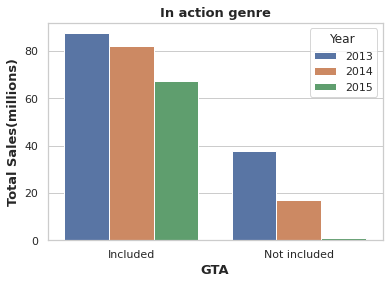

In [153]:
#plt.figure(figsize=(12, 4))
g = sns.barplot(x= 'GTA',y='Total sales (millions)',hue='Year', data=df_action, ci=None)
plt.xticks(rotation=0)
plt.ylabel('Total Sales(millions)',fontsize = 13, fontweight = 'bold')
plt.xlabel('GTA',fontsize = 13, fontweight = 'bold')

plt.title("In action genre",fontsize = 13, fontweight = 'bold')
plt.show()

<Figure size 3000x2500 with 0 Axes>

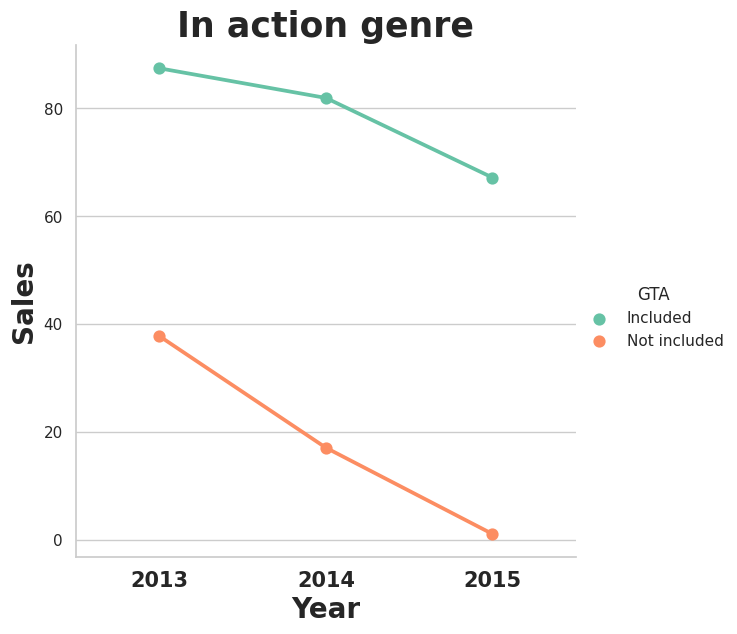

In [130]:
plt.figure(figsize=(30, 25))
sns.set_theme(style="whitegrid")
g= sns.catplot(x= 'Year',y='Total sales (millions)', hue='GTA', kind="point", palette = "Set2", data=df_action, alpha=.6, height=6)
#plt.xticks(rotation=45)
plt.title("In action genre",fontsize = 25, fontweight = 'bold')
#plt.ylabel('Sales', fontsize='20', fontweight = 'bold')
#plt.xlabel('Year', fontsize='20', fontweight = 'bold')
#plt.ylim([0, 0.5])
g.set_xticklabels(rotation=0, fontsize=15, fontweight = 'bold')
g.set_xlabels('Year', fontsize=20, fontweight = 'bold') # not set_label
g.set_ylabels('Sales', fontsize=20, fontweight = 'bold')
plt.show()

### (1)-2 독립성 검정 (이원카이제곱검정)  -  Call of duty vs Non call of duty

In [125]:
# call of duty vs non call of duty 독립성검정(카이제곱검정)

from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency([shooter_n,shooter_y])

msg = 'Test Statistic: {}\np-value: {}\nDegree of Freedom: {}'
print(msg.format(chi2, p, dof))
print(expected)

Test Statistic: 1.4893835143962528
p-value: 0.47488065592610207
Degree of Freedom: 2
[[38.72492507 40.73741121 40.81766372]
 [24.00507493 25.25258879 25.30233628]]


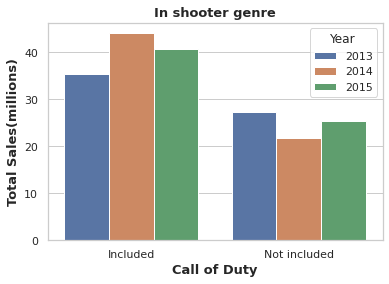

In [151]:
#plt.figure(figsize=(12, 4))
g = sns.barplot(x= 'call of Duty',y='Total sales (millions)',hue='Year', data=df_shooter, ci=None)
plt.xticks(rotation=0)
plt.ylabel('Total Sales(millions)',fontsize = 13, fontweight = 'bold')
plt.xlabel('Call of Duty',fontsize = 13, fontweight = 'bold')

plt.title("In shooter genre",fontsize = 13, fontweight = 'bold')
plt.show()

<Figure size 3000x2500 with 0 Axes>

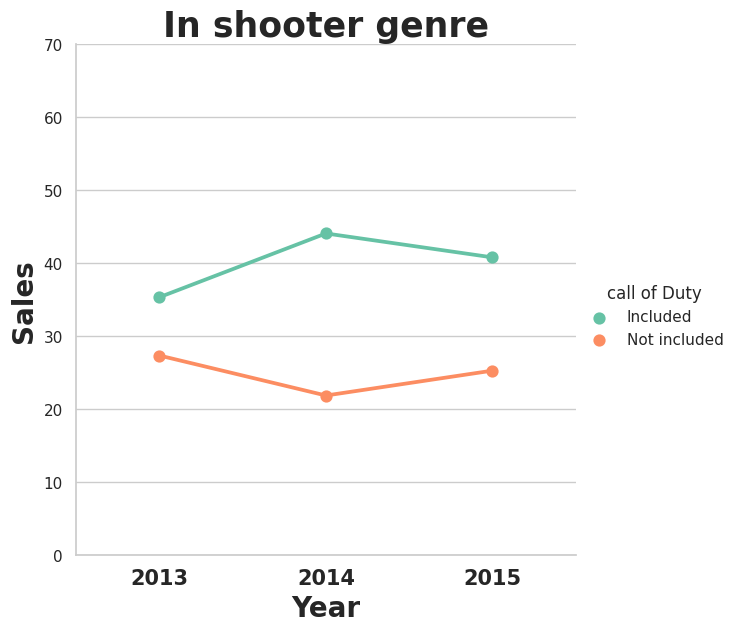

In [129]:
plt.figure(figsize=(30, 25))
sns.set_theme(style="whitegrid")

g= sns.catplot(x="Year", y="Total sales (millions)", hue="call of Duty", kind="point", palette = "Set2", data=df_shooter, alpha=.6, height=6)
#plt.xticks(rotation=45)
plt.title("In shooter genre",fontsize = 25, fontweight = 'bold')
#plt.ylabel('Sales', fontsize='20', fontweight = 'bold')
#plt.xlabel('Year', fontsize='20', fontweight = 'bold')
plt.ylim([0, 70])
g.set_xticklabels(rotation=0, fontsize=15, fontweight = 'bold')
g.set_xlabels('Year', fontsize=20, fontweight = 'bold') # not set_label
g.set_ylabels('Sales', fontsize=20, fontweight = 'bold')
plt.show()


### (1)-3 독립성 검정 (이원카이제곱검정)  -  Non GTA vs Non call of duty

In [223]:
test_Not1st = pd.DataFrame([action_n,shooter_n], columns=['2013','2014','2015'], index=['action_n','shooter_n'])
test_Not1st

df_Not1st = pd.DataFrame({'with out': ['GTA', 'Call of Duty','GTA', 'Call of Duty','GTA', 'Call of Duty'], 
                            'Year':[2013,2013,2014,2014,2015,2015], 
                            'Total sales (millions)': list(test_Not1st.melt().value)})
df_Not1st

with out  Year  Total sales (millions)
0           GTA  2013                   87.44
1  Call of Duty  2013                   35.36
2           GTA  2014                   81.94
3  Call of Duty  2014                   44.10
4           GTA  2015                   67.17
5  Call of Duty  2015                   40.82

In [224]:
# call of duty vs non call of duty 독립성검정(카이제곱검정)

from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency([shooter_n,action_n])

msg = 'Test Statistic: {}\np-value: {}\nDegree of Freedom: {}'
print(msg.format(chi2, p, dof))
print(expected)

Test Statistic: 2.2282582953166767
p-value: 0.3282009690670054
Degree of Freedom: 2
[[41.39333576 42.48547263 36.4011916 ]
 [81.40666424 83.55452737 71.5888084 ]]


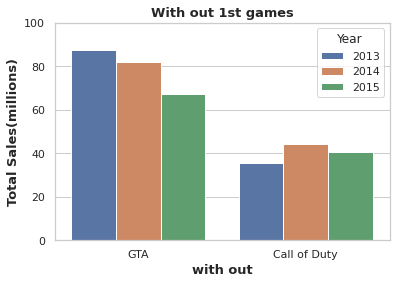

In [226]:
#plt.figure(figsize=(12, 4))
g = sns.barplot(x= 'with out',y='Total sales (millions)',hue='Year', data=df_Not1st, ci=None)
plt.xticks(rotation=0)
plt.ylabel('Total Sales(millions)',fontsize = 13, fontweight = 'bold')
plt.xlabel('with out',fontsize = 13, fontweight = 'bold')
plt.ylim([0, 100])
plt.title("With out 1st games",fontsize = 13, fontweight = 'bold')
plt.show()

<Figure size 2160x1800 with 0 Axes>

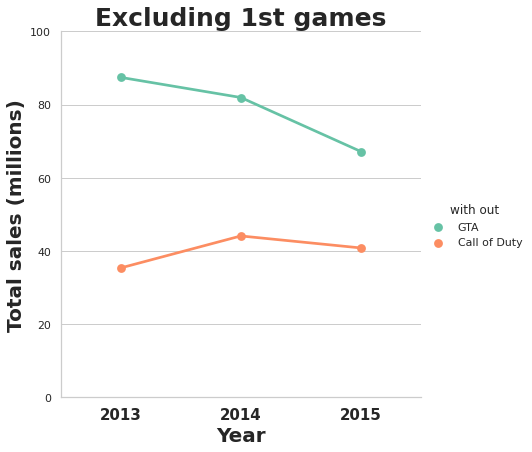

In [228]:
plt.figure(figsize=(30, 25))
sns.set_theme(style="whitegrid")

g= sns.catplot(x= 'Year',y='Total sales (millions)',hue='with out', kind="point", palette = "Set2", data=df_Not1st, alpha=.6, height=6)
#plt.xticks(rotation=45)
plt.title("Excluding 1st games",fontsize = 25, fontweight = 'bold')
#plt.ylabel('Sales', fontsize='20', fontweight = 'bold')
#plt.xlabel('Year', fontsize='20', fontweight = 'bold')
plt.ylim([0, 100])
g.set_xticklabels(rotation=0, fontsize=15, fontweight = 'bold')
g.set_xlabels('Year', fontsize=20, fontweight = 'bold') # not set_label
g.set_ylabels('Total sales (millions)', fontsize=20, fontweight = 'bold')
plt.show()


### (1)-4 독립성 검정 (이원카이제곱검정)  -   GTA vs call of duty

In [218]:
test_1st = pd.DataFrame([action_y,shooter_y], columns=['2013','2014','2015'], index=['action_y','shooter_y'])
test_1st

df_1st = pd.DataFrame({'1st game': ['GTA', 'Call of Duty','GTA', 'Call of Duty','GTA', 'Call of Duty'], 
                            'Year':[2013,2013,2014,2014,2015,2015], 
                            'Total sales (millions)': list(test_1st.melt().value)})
df_1st

1st game  Year  Total sales (millions)
0           GTA  2013                   37.77
1  Call of Duty  2013                   27.37
2           GTA  2014                   17.07
3  Call of Duty  2014                   21.89
4           GTA  2015                    1.08
5  Call of Duty  2015                   25.30

In [219]:
# call of duty vs non call of duty 독립성검정(카이제곱검정)

from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency([shooter_y,action_y])

msg = 'Test Statistic: {}\np-value: {}\nDegree of Freedom: {}'
print(msg.format(chi2, p, dof))
print(expected)

Test Statistic: 22.28554911156977
p-value: 1.4479531076004958e-05
Degree of Freedom: 2
[[37.22285714 22.26285714 15.07428571]
 [27.91714286 16.69714286 11.30571429]]


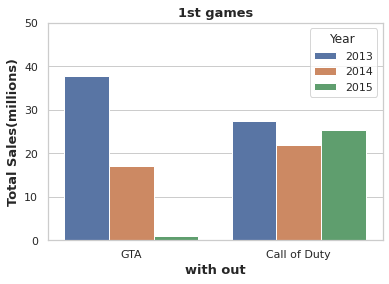

In [220]:
#plt.figure(figsize=(12, 4))
g = sns.barplot(x= '1st game',y='Total sales (millions)',hue='Year', data=df_1st, ci=None)
plt.xticks(rotation=0)
plt.ylabel('Total Sales(millions)',fontsize = 13, fontweight = 'bold')
plt.xlabel('with out',fontsize = 13, fontweight = 'bold')
plt.ylim([0, 50])
plt.title("1st games",fontsize = 13, fontweight = 'bold')
plt.show()

<Figure size 2160x1800 with 0 Axes>

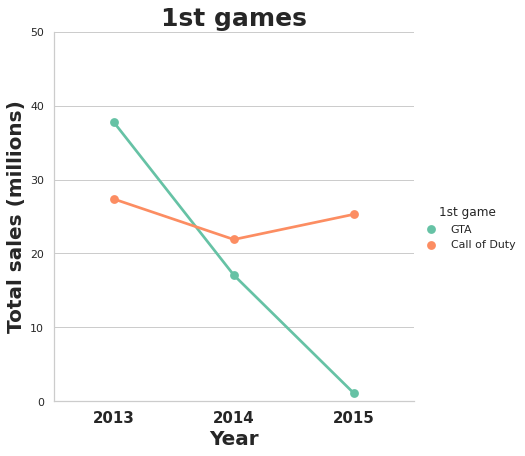

In [222]:
plt.figure(figsize=(30, 25))
sns.set_theme(style="whitegrid")

g= sns.catplot(x= 'Year',y='Total sales (millions)',hue='1st game', kind="point", palette = "Set2", data=df_1st, alpha=.6, height=6)
#plt.xticks(rotation=45)
plt.title("1st games",fontsize = 25, fontweight = 'bold')
#plt.ylabel('Sales', fontsize='20', fontweight = 'bold')
#plt.xlabel('Year', fontsize='20', fontweight = 'bold')
plt.ylim([0, 50])
g.set_xticklabels(rotation=0, fontsize=15, fontweight = 'bold')
g.set_xlabels('Year', fontsize=20, fontweight = 'bold') # not set_label
g.set_ylabels('Total sales (millions)', fontsize=20, fontweight = 'bold')
plt.show()


### (2) 적합성 검정 (일원카이제곱검정)

In [131]:
# 관찰빈도
action_obs = action_y
shooter_obs = shooter_y

# 기대빈도 = 실제 
action_yn = [x+y for x,y in zip(action_y, action_n)]
action_y_ratio = [x/y for x,y in zip(action_obs, action_yn)]

shooter_yn = [x1+y1 for x1,y1 in zip(shooter_y, shooter_n)]
shooter_y_ratio = [x/y for x,y in zip(shooter_obs, shooter_yn)]

action_exp = [x*y for x,y in zip(shooter_yn, action_y_ratio)]
shooter_exp = [x*y for x,y in zip(action_yn, shooter_y_ratio)]

In [132]:
action_exp

[18.92270665282326, 11.377126552873447, 1.0462945054945056]

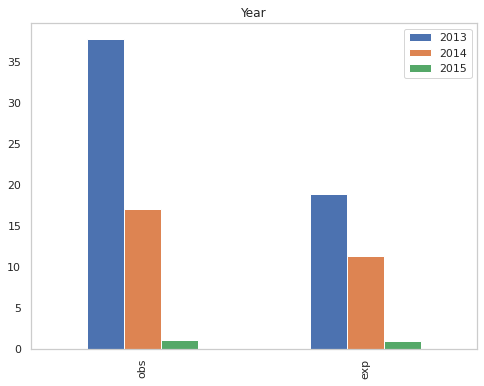

In [133]:
import matplotlib.pyplot as plt
%matplotlib inline

xc = pd.DataFrame([action_obs,action_exp], columns=['2013','2014','2015'], index=['obs','exp'])
xc

xc.plot(kind='bar', title='Year', figsize=(8,6))
plt.grid()

In [134]:
from scipy.stats import chisquare

result = chisquare(action_obs, f_exp=action_exp)
result.pvalue.round(2)

0.0

In [135]:
result = chisquare(shooter_obs, f_exp=shooter_exp)
result.pvalue.round(2)

0.0

## (3) 플렛폼 분석 

**Nothing Special**

In [150]:
dup = df3.duplicated(['Name'], keep=False)

df3_dup = pd.concat([df3, dup], axis=1)
df3_dup.rename(columns = {0 : 'Dup'}, inplace = True)

df3_dup_T = df3_dup[df3_dup["Dup"] == True]
df3_dup_F = df3_dup[df3_dup["Dup"] == False]
df3_dup_T.sort_values("Name")
df3_dup_T.head()

Unnamed: 0                                               Name Platform  \
0            1                       Candace Kane's Candy Factory       DS   
4            5          Ben 10 Ultimate Alien: Cosmic Destruction      PS3   
6            7              JASF: Jane's Advanced Strike Fighters       PC   
9           10  The Penguins of Madagascar: Dr. Blowhole Retur...      PS3   
15          16                                        Mini Ninjas      PS3   

    Year       Genre          Publisher  NA_Sales  EU_Sales  JP_Sales  \
0   2008      Action          Destineer      0.04      0.00       0.0   
4   2010    Platform        D3Publisher      0.12      0.09       0.0   
6   2011  Simulation        Deep Silver      0.02      0.01       0.0   
9   2011      Action                THQ      0.04      0.03       0.0   
15  2009      Action  Eidos Interactive      0.14      0.16       0.0   

    Other_Sales  Sales_sum  pltf_type   Dup  
0          0.00       0.04   portable  True  
4          0.04       0.25  homevideo  True  
6          0.00       0.03         pc  True  
9          0.01       0.08  homevideo  True  
15         0.06       0.36  homevideo  True

### [1] year per plt_type 

In [137]:
df3.head()

Unnamed: 0                                            Name Platform  Year  \
0           1                    Candace Kane's Candy Factory       DS  2008   
1           2                                  The Munchables      Wii  2009   
2           3  Otome wa Oanesama Boku ni Koi Shiteru Portable      PSP  2010   
3           4                Deal or No Deal: Special Edition       DS  2010   
4           5       Ben 10 Ultimate Alien: Cosmic Destruction      PS3  2010   

       Genre           Publisher  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
0     Action           Destineer      0.04      0.00      0.00         0.00   
1     Action  Namco Bandai Games      0.17      0.00      0.00         0.01   
2  Adventure           Alchemist      0.00      0.00      0.02         0.00   
3       Misc           Zoo Games      0.04      0.00      0.00         0.00   
4   Platform         D3Publisher      0.12      0.09      0.00         0.04   

   Sales_sum  pltf_type  
0       0.04   portable  
1       0.18  homevideo  
2       0.02   portable  
3       0.04   portable  
4       0.25  homevideo

In [138]:
df3.loc[df3['Sales_sum'].idxmax()]

Unnamed: 0           2909
Name           Wii Sports
Platform              Wii
Year                 2006
Genre              Sports
Publisher        Nintendo
NA_Sales            41.49
EU_Sales            29.02
JP_Sales             3.77
Other_Sales          8.46
Sales_sum           82.74
pltf_type       homevideo
Name: 2908, dtype: object

<Figure size 2160x1800 with 0 Axes>

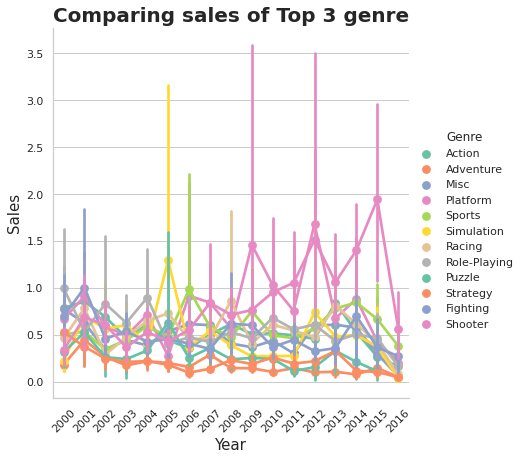

In [139]:
plt.figure(figsize=(30, 25))
sns.set_theme(style="whitegrid")

g= sns.catplot(x="Year", y="Sales_sum", hue="Genre", kind="point", palette = "Set2", data=df3, alpha=.6, height=6)
#plt.xticks(rotation=45)
plt.title("Comparing sales of Top 3 genre",fontsize=20, fontweight = 'bold')
#plt.ylabel('Sales', fontsize='20', fontweight = 'bold')
#plt.xlabel('Year', fontsize='20', fontweight = 'bold')
#plt.ylim([0, 0.5])
g.set_xticklabels(rotation=45)
g.set_xlabels('Year', fontsize=15) # not set_label
g.set_ylabels('Sales', fontsize=15)
plt.show()

### [2] 

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, 'DS'),
  Text(1, 0, 'PS2'),
  Text(2, 0, 'PS3'),
  Text(3, 0, 'Wii'),
  Text(4, 0, 'X360'),
  Text(5, 0, 'PSP'),
  Text(6, 0, 'PS'),
  Text(7, 0, 'PC'),
  Text(8, 0, 'XB'),
  Text(9, 0, 'GBA'),
  Text(10, 0, 'GC'),
  Text(11, 0, '3DS'),
  Text(12, 0, 'PSV'),
  Text(13, 0, 'PS4'),
  Text(14, 0, 'N64'),
  Text(15, 0, 'SNES'),
  Text(16, 0, 'XOne'),
  Text(17, 0, 'SAT'),
  Text(18, 0, 'WiiU'),
  Text(19, 0, '2600'),
  Text(20, 0, 'NES'),
  Text(21, 0, 'GB'),
  Text(22, 0, 'DC'),
  Text(23, 0, 'GEN'),
  Text(24, 0, 'NG'),
  Text(25, 0, 'SCD'),
  Text(26, 0, 'WS'),
  Text(27, 0, '3DO'),
  Text(28, 0, 'TG16'),
  Text(29, 0, 'GG'),
  Text(30, 0, 'PCFX')])

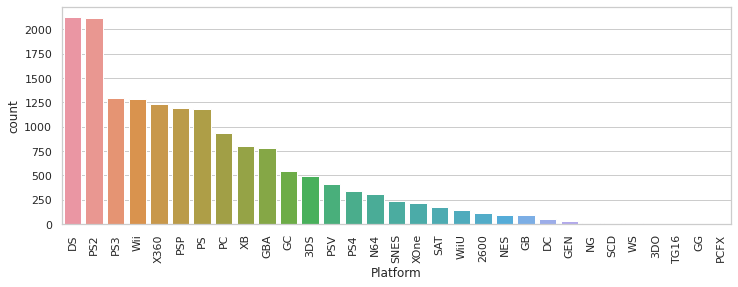

In [140]:
plt.figure(figsize=(12, 4))
sns.countplot(x="Platform", data=df0, order = df0['Platform'].value_counts().index)
plt.xticks(rotation=90)

In [141]:
df2.groupby(['Year', 'Platform'])['Sales_sum'].sum()

Year  Platform
2000  DC            5.99
      GB           19.76
      GBA           0.07
      N64          33.88
      PC            4.65
      PS           96.35
      PS2          39.17
      WS            0.68
      XB            0.99
2001  DC            1.07
      GB            9.24
      GBA          61.35
      GC           26.34
      N64           3.25
      PC            5.50
      PS           35.59
      PS2         163.73
      WS            0.28
      XB           22.26
2002  DC            0.29
      GBA          74.11
      GC           51.81
      N64           0.08
      PC            8.57
      PS            6.65
      PS2         205.38
      XB           47.18
2003  GBA          56.67
      GC           49.90
      PC            8.91
      PS            2.07
      PS2         184.31
      XB           55.04
2004  DS           17.41
      GBA          72.67
      GC           28.82
      PC           10.39
      PS2         210.47
      PSP           7.09
      XB  

In [142]:
year_max_df = df2.groupby(['Year', 'Platform'])['Sales_sum'].sum().reset_index(name='Sales_sum')
year_max_idx = year_max_df.groupby(['Year'])['Sales_sum'].transform(max) == year_max_df['Sales_sum']
year_max_platf = year_max_df[year_max_idx].reset_index(drop=True)
year_max_platf = year_max_platf.drop_duplicates(subset=["Year", "Sales_sum"], keep='last').reset_index(drop=True)
# year_max_Platform

In [143]:
year_max_platf

Year Platform  Sales_sum
0   2000       PS      96.35
1   2001      PS2     163.73
2   2002      PS2     205.38
3   2003      PS2     184.31
4   2004      PS2     210.47
5   2005      PS2     160.66
6   2006      Wii     137.85
7   2007      Wii     154.60
8   2008      Wii     173.98
9   2009      Wii     210.26
10  2010     X360     170.95
11  2011      PS3     159.37
12  2012      PS3     108.32
13  2013      PS3     117.42
14  2014      PS4      98.83
15  2015      PS4     112.86
16  2016      PS4      39.30

In [144]:
platforms = year_max_platf['Platform'].values
# genre[0]

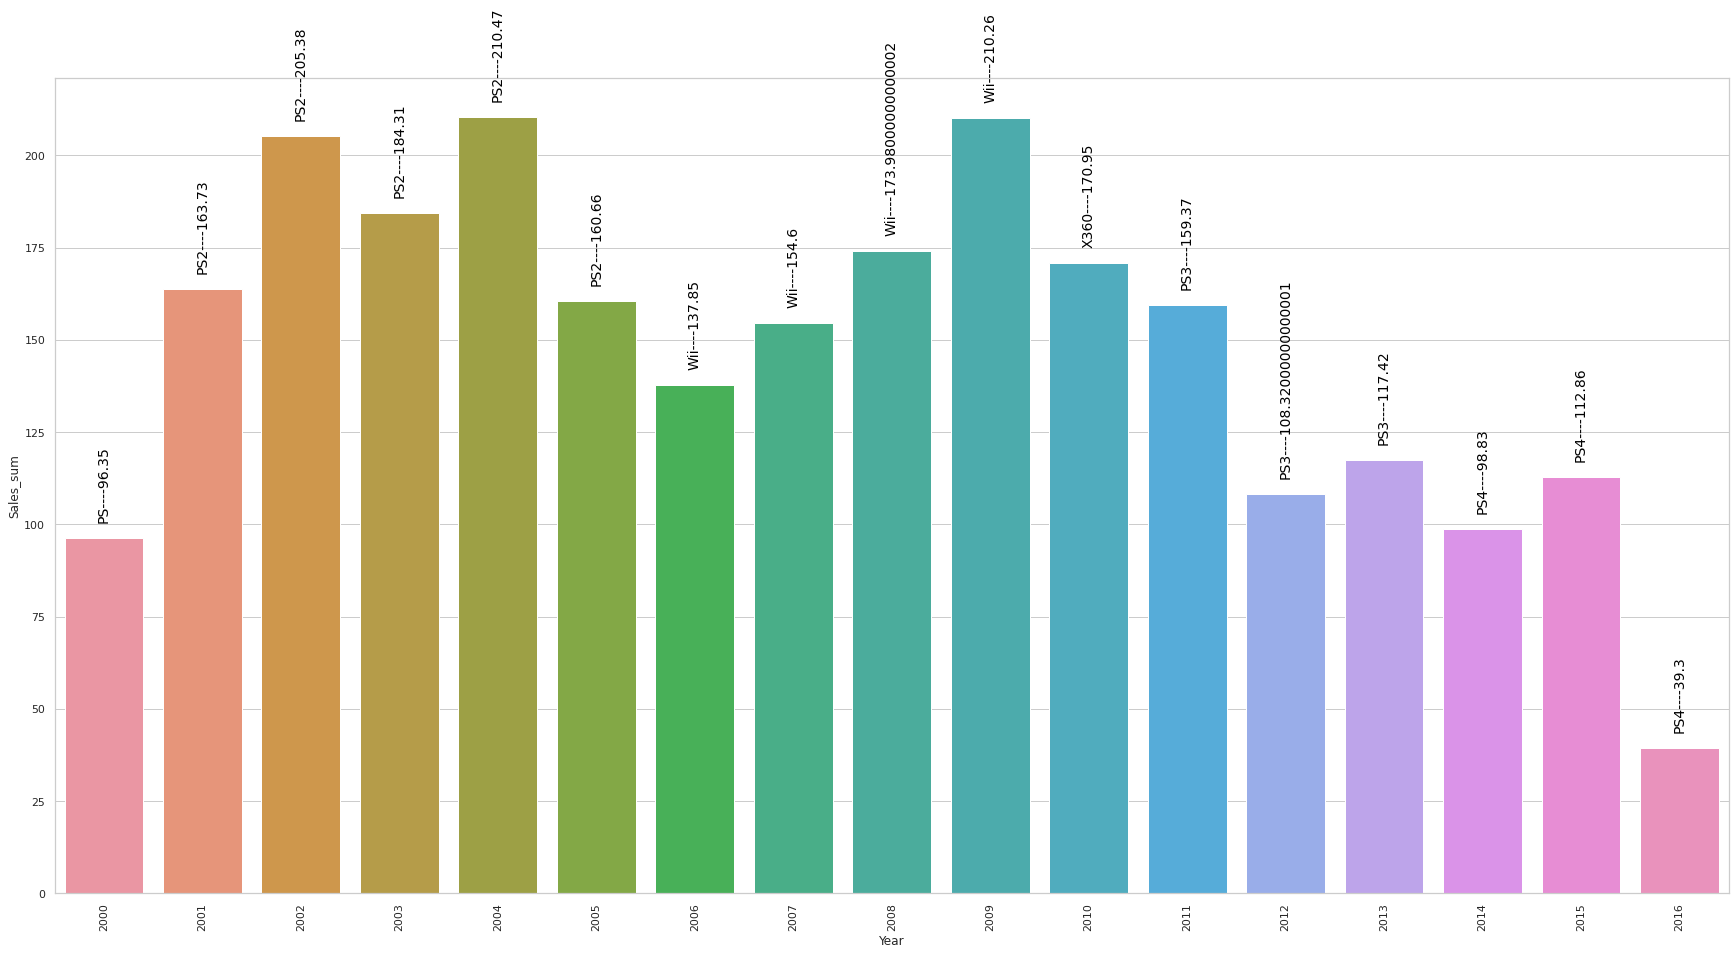

In [145]:
plt.figure(figsize=(30, 15))
g = sns.barplot(x='Year', y='Sales_sum', data=year_max_platf)
index = 0
for value in year_max_platf['Sales_sum'].values:
#     print(asd)
    g.text(index, value + 5, str(platforms[index] + '----' +str(value)), color='#000', size=14, rotation= 90, ha="center")
    index += 1
plt.xticks(rotation=90)
plt.show()

In [146]:
comp_platform = df3[['Platform', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
comp_platform.head()

Platform  NA_Sales  EU_Sales  JP_Sales  Other_Sales
0       DS      0.04      0.00      0.00         0.00
1      Wii      0.17      0.00      0.00         0.01
2      PSP      0.00      0.00      0.02         0.00
3       DS      0.04      0.00      0.00         0.00
4      PS3      0.12      0.09      0.00         0.04

In [147]:
comp_platform = comp_platform.groupby(by=['Platform']).sum().reset_index()


In [148]:
# comp_table = comp_map.reset_index()
comp_table = pd.melt(comp_platform, id_vars=['Platform'], value_vars=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'], var_name='Sale_Area', value_name='Sale_Price')
comp_table.head()

Platform Sale_Area  Sale_Price
0      3DS  NA_Sales       72.86
1       DC  NA_Sales        2.53
2       DS  NA_Sales      387.66
3       GB  NA_Sales        9.12
4      GBA  NA_Sales      178.26

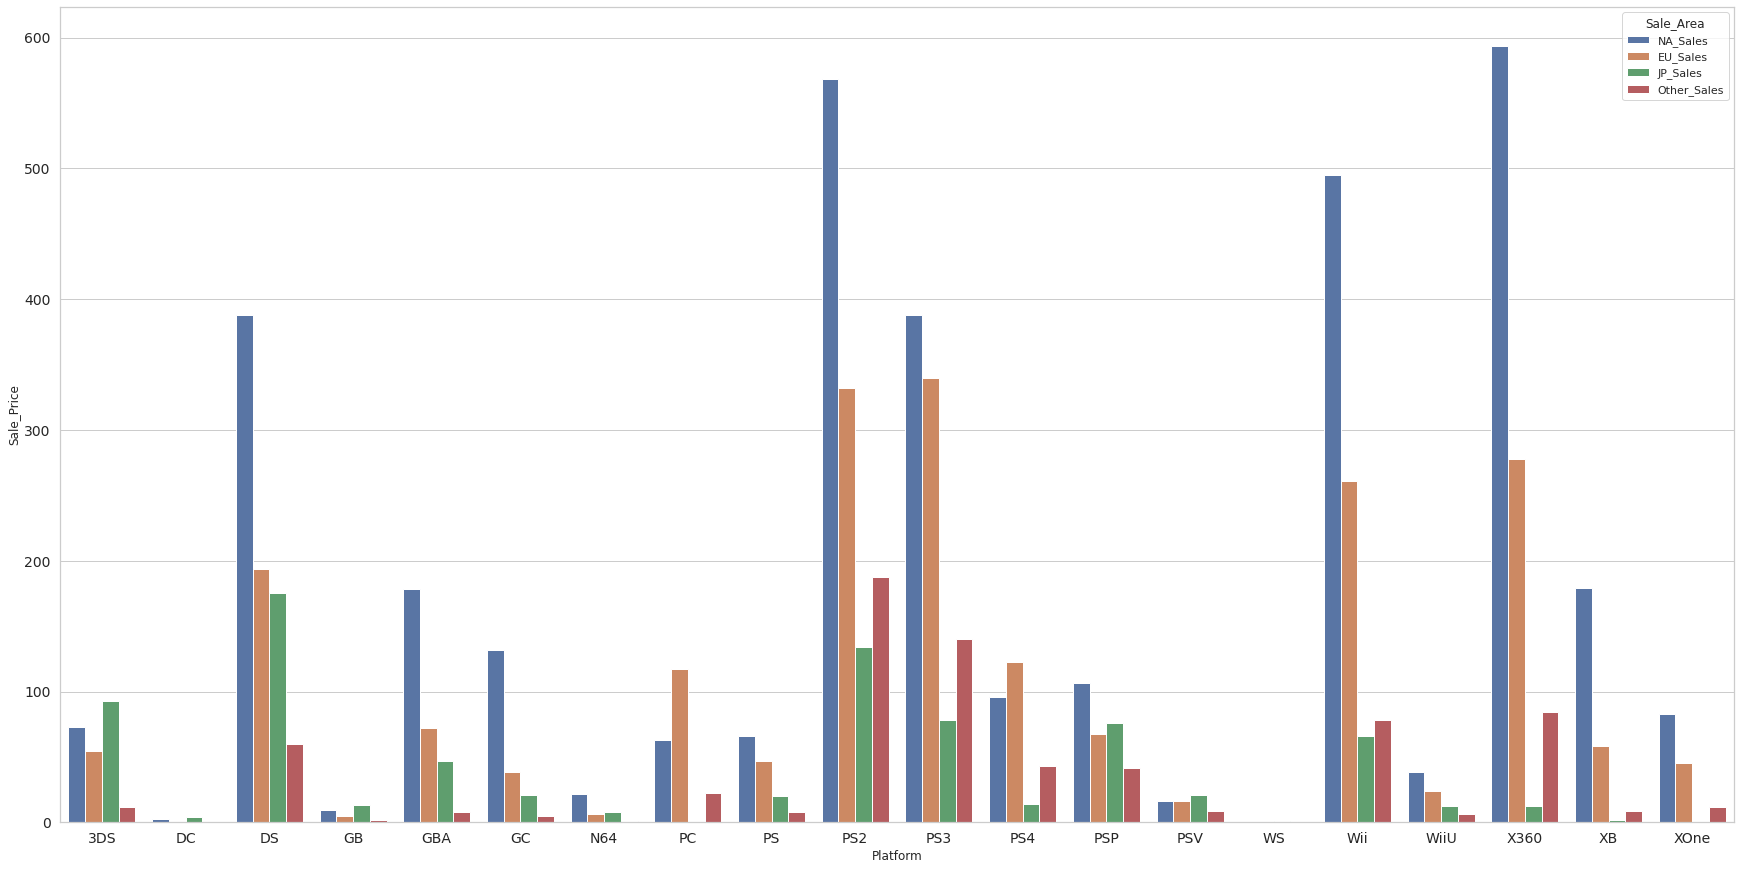

In [149]:
plt.figure(figsize=(30, 15))
sns.barplot(x='Platform', y='Sale_Price', hue='Sale_Area', data=comp_table)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

### [3] 

### [4] 